# **EDA: Online Shoppers Purchasing Intention Dataset**



## **1. Introducción y contexto de negocio**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from scipy.stats import chi2_contingency

# Configuración de visualización
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

#### **Contexto de negocio**

El comercio electrónico ha transformado radicalmente el panorama comercial, y entender el comportamiento de los usuarios en sitios web es crucial para optimizar las ventas. Este análisis explora un conjunto de datos que contiene información sobre sesiones de navegación en un sitio de comercio electrónico, con el objetivo de identificar patrones que puedan predecir si un usuario realizará una compra.

#### **Objetivos del análisis**

- Identificar factores clave que influyen en la decisión de compra de los usuarios  
- Descubrir segmentos de alto valor con mayor probabilidad de conversión  
- Comprender patrones temporales (estacionalidad, efectos del fin de semana)  
- Explorar el comportamiento de navegación de compradores vs. no compradores  
- Desarrollar insights accionables para mejorar la tasa de conversión del sitio  

Este análisis será la base para construir un modelo predictivo que ayude a identificar usuarios con alta probabilidad de compra, permitiendo implementar estrategias de marketing personalizadas.

#### **Aplicaciones prácticas para el negocio**

- **Personalización de la experiencia del usuario** basada en su probabilidad de compra  
- **Optimización de campañas de marketing** enfocadas en periodos de alta conversión  
- **Mejora del diseño del sitio web** para reducir tasas de rebote y abandono  
- **Estrategias de retargeting** más efectivas para visitantes recurrentes  
- **Asignación eficiente de recursos de marketing** durante temporadas altas  


## **2. Configuración y exploración básica del dataset**

In [2]:
# Carga del dataset
df = pd.read_csv('../data/raw/online_shoppers_intention.csv')

# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
display(df.head())

Primeras 5 filas del dataset:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### **Exploración básica del dataset**

Comenzamos explorando las características fundamentales del dataset para entender su estructura, calidad y dimensiones. La comprensión de los datos es el primer paso crítico para cualquier análisis de comportamiento de usuario.

El dataset contiene información sobre sesiones de usuario en un sitio de comercio electrónico, con una combinación de métricas de comportamiento y variables categóricas. Cada fila representa una sesión de navegación única.


In [3]:
# Información general del dataset
print("\nInformación general del dataset:")
df.info()

# Dimensiones del dataset
print(f"\nDimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")

# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas de variables numéricas:")
display(df.describe().T)  # Transponemos para mejor visualización

# Verificar valores nulos
print("\nVerificación de valores nulos por columna:")
display(df.isnull().sum())

# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")

# Eliminar duplicados para análisis más preciso
df_clean = df.drop_duplicates().reset_index(drop=True)
print(f"Dataset después de eliminar duplicados: {df_clean.shape[0]} filas x {df_clean.shape[1]} columnas")

# Exportar el dataset limpio a CSV
df_clean.to_csv('../data/clean/online_shoppers_clean.csv', index=False)
print(f"Dataset limpio exportado a: data/clean/online_shoppers_clean.csv")


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  i

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000



Verificación de valores nulos por columna:


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


Número de filas duplicadas: 125
Dataset después de eliminar duplicados: 12205 filas x 18 columnas


Dataset limpio exportado a: data/clean/online_shoppers_clean.csv


#### **Observaciones de la exploración básica**

- El dataset contiene **12,330 registros** (sesiones) con **18 variables**, incluyendo **10 variables numéricas** y **8 categóricas**.  
- Después de eliminar registros duplicados, contamos con **12,205 sesiones únicas** para analizar.

##### **Variables numéricas clave**

- **Variables de páginas visitadas**:  
  - `Administrative`, `Informational`, `ProductRelated`  
- **Variables de duración**:  
  - `Administrative_Duration`, `Informational_Duration`, `ProductRelated_Duration`  
- **Métricas de abandono**:  
  - `BounceRates`, `ExitRates`  
- **Métricas de valor**:  
  - `PageValues`  
- **Eventos especiales**:  
  - `SpecialDay`  

##### **Variables categóricas**

- **Temporalidad**:  
  - `Month`, `Weekend`  
- **Características de usuario**:  
  - `VisitorType`, `Region`  
- **Tecnología**:  
  - `OperatingSystems`, `Browser`, `TrafficType`  
- **Resultado (variable objetivo)**:  
  - `Revenue`  

##### **Calidad de los datos**

- No se detectaron **valores nulos** en ninguna columna.  
- Se identificaron **125 registros duplicados** (aproximadamente **1%** del dataset).  
- Trabajaremos con el dataset limpio (**`df_clean`**) para todos los análisis subsiguientes.

---

Antes de profundizar en las relaciones entre variables, analizaremos la distribución de nuestra **variable objetivo** (`Revenue`) para entender mejor el desbalance en las conversiones, lo cual tiene importantes implicaciones tanto para el análisis como para las estrategias de negocio.


## **3. Análisis univariado focalizado**

#### **3.1 Análisis de la variable objetivo (Revenue)**

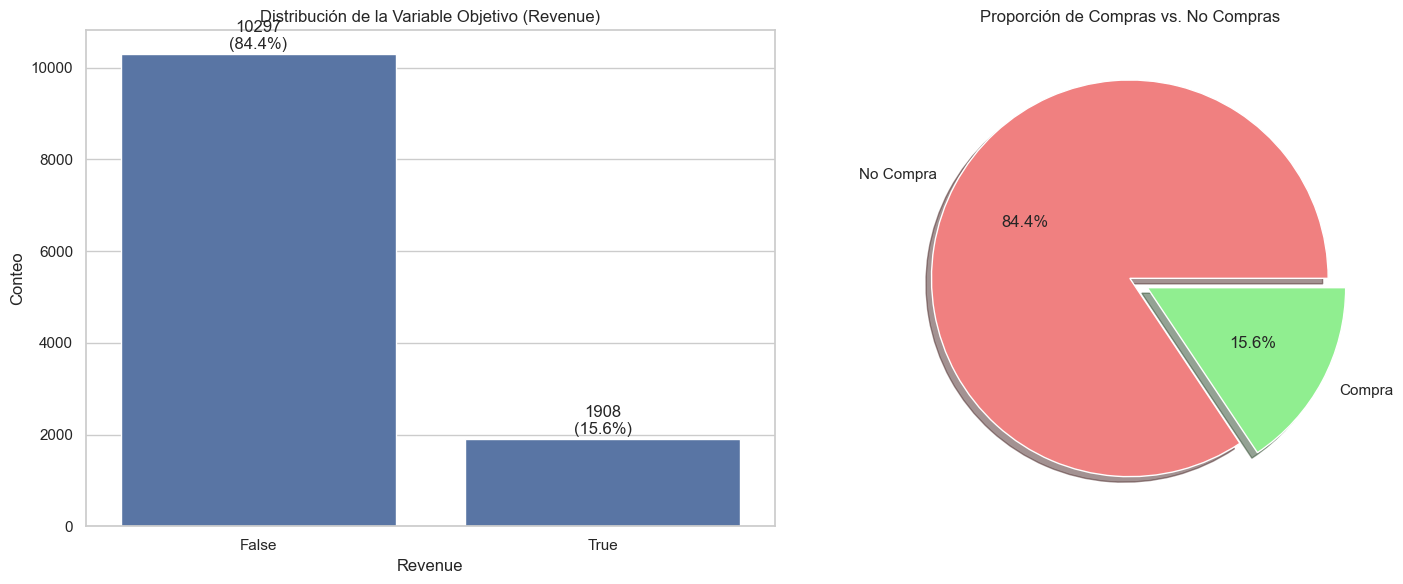

Distribución de la variable Revenue:
Revenue
False    10297
True      1908
Name: count, dtype: int64

Porcentaje de cada clase:
Revenue
False    84.367063
True     15.632937
Name: proportion, dtype: float64

--- Análisis del desbalance de clases ---
Proporción de desbalance (mayoría/minoría): 5.40:1


In [4]:
# Visualización de la distribución de Revenue
plt.figure(figsize=(15, 6))

# Gráfico de barras para la distribución de Revenue
plt.subplot(1, 2, 1)
revenue_counts = df_clean['Revenue'].value_counts()
sns.barplot(x=revenue_counts.index, y=revenue_counts.values)
plt.title('Distribución de la Variable Objetivo (Revenue)')
plt.xlabel('Revenue')
plt.ylabel('Conteo')

# Añadir etiquetas con valores y porcentajes
total = len(df_clean)
for i, count in enumerate(revenue_counts.values):
    percentage = count / total * 100
    plt.text(i, count + 100, f"{count}\n({percentage:.1f}%)", ha='center')

# Gráfico de pie para visualizar el desbalance
plt.subplot(1, 2, 2)
plt.pie(revenue_counts.values, labels=['No Compra', 'Compra'],
        autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'],
        explode=(0, 0.1), shadow=True)
plt.title('Proporción de Compras vs. No Compras')

plt.tight_layout()
plt.show()

# Estadísticas detalladas de la variable objetivo
print("Distribución de la variable Revenue:")
print(df_clean['Revenue'].value_counts())
print("\nPorcentaje de cada clase:")
print(df_clean['Revenue'].value_counts(normalize=True) * 100)

# Análisis del desbalance y sus implicaciones
print("\n--- Análisis del desbalance de clases ---")
minority_class_size = df_clean['Revenue'].sum()  # Suma de True (1)
majority_class_size = len(df_clean) - minority_class_size
imbalance_ratio = majority_class_size / minority_class_size
print(f"Proporción de desbalance (mayoría/minoría): {imbalance_ratio:.2f}:1")

#### **Análisis de la distribución de la variable objetivo (`Revenue`)**

Comenzamos analizando la distribución de nuestra **variable objetivo** (`Revenue`), que indica si una sesión de navegación resultó en una compra (`True`) o no (`False`).

Los gráficos muestran un **notable desbalance en las clases**:

- Solo alrededor del **15.6%** de las sesiones resultan en una compra.
- El **84.4%** de las sesiones no generan conversión.
- Esto representa una proporción de desbalance aproximada de **5.4 : 1** (no compra : compra).

##### **Implicaciones para el negocio**

- La **baja tasa de conversión (15.6%)** es típica en comercio electrónico:  
  - Tasas promedio del sector: **1–3%** para visitantes nuevos y **15–20%** para visitantes recurrentes.  
- Este desbalance indica una **gran oportunidad de optimización**:  
  - Incluso **pequeñas mejoras porcentuales** pueden traducirse en **significativos aumentos de ingresos**.
- Para el **modelado predictivo**, este desbalance sugiere la necesidad de:
  - Técnicas de **re-muestreo** como **SMOTE**.
  - O **ajuste de pesos** en los algoritmos, para evitar un sesgo hacia la clase mayoritaria (no compra).

---

En el **contexto de negocio**, es crucial entender que **no todas las sesiones** tienen la misma intención de compra.  
Muchos usuarios están simplemente **explorando o investigando productos**.

Nuestro análisis se enfocará en **identificar las características** que distinguen a las sesiones con **alta probabilidad de conversión**.

---

A continuación, analizaremos las **variables numéricas y categóricas** para identificar **patrones** que puedan ayudarnos a predecir comportamientos de compra.


#### **3.2 Análisis de variables numéricas**

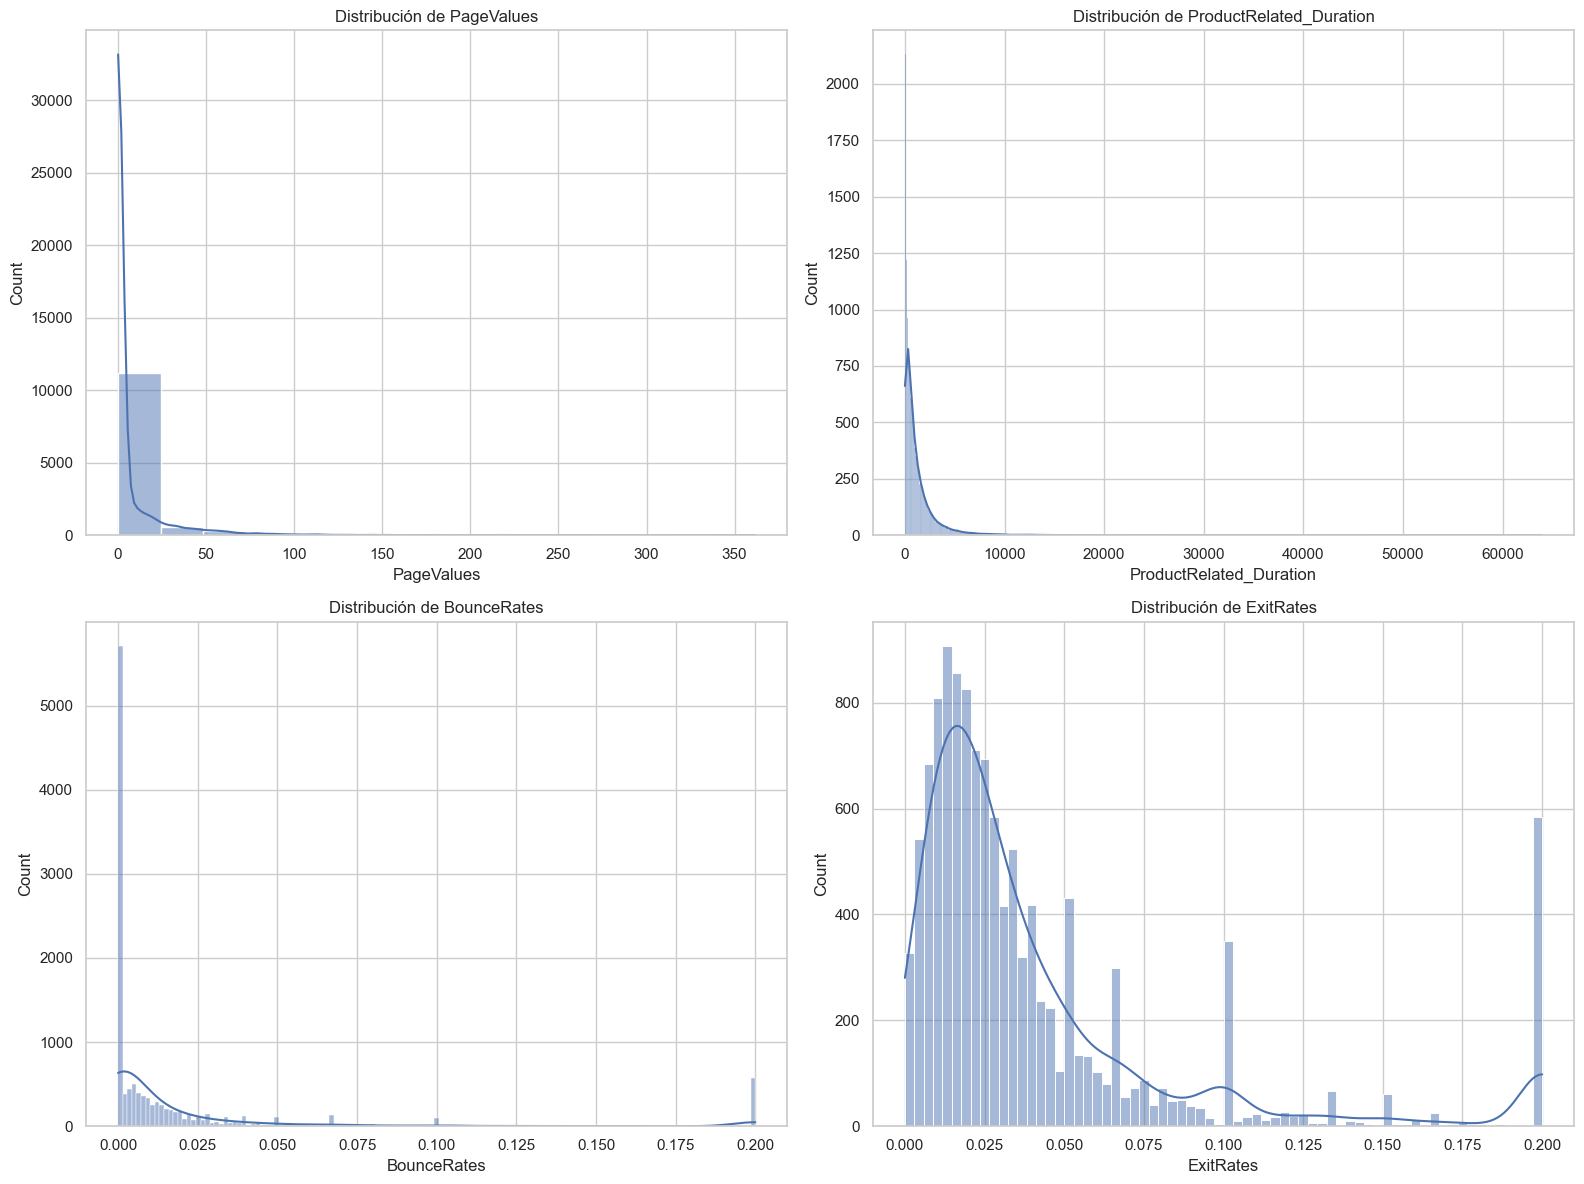


Estadísticas descriptivas detalladas:


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,skew,kurt
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.00000,0.000000,0.000000,9.000000,94.700000,352.208095,838.704889,3398.750000,5.592152,50.136788
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,199.000000,722.379200,2549.375000,7.540291,75.534235
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,0.00000,0.000000,193.000000,608.942857,1477.154762,4312.956282,8704.271573,63973.522230,7.253161,136.681451
BounceRates,12205.0,0.020370,0.045255,0.0,0.00000,0.000000,0.000000,0.002899,0.016667,0.149333,0.200000,0.200000,3.162425,9.333988
ExitRates,12205.0,0.041466,0.046163,0.0,0.00125,0.004545,0.014231,0.025000,0.048529,0.173714,0.200000,0.200000,2.234645,4.642070
PageValues,12205.0,5.949574,18.653671,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,38.301457,86.108689,361.763742,6.350983,64.998027
SpecialDay,12205.0,0.061942,0.199666,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.600000,1.000000,1.000000,3.285902,9.797646


In [5]:
# Obtener lista de variables numéricas
numeric_cols = df_clean.select_dtypes(include=['float64']).columns.tolist()

# Crear histogramas para variables numéricas (mostrando solo algunas claves)
key_numeric_cols = ['PageValues', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']
plt.figure(figsize=(16, 12))
for i, col in enumerate(key_numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()
plt.show()

# Estadísticas descriptivas más detalladas
print("\nEstadísticas descriptivas detalladas:")
desc_stats = df_clean[numeric_cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T
desc_stats['skew'] = df_clean[numeric_cols].skew()
desc_stats['kurt'] = df_clean[numeric_cols].kurt()
display(desc_stats)

#### **Análisis de las variables numéricas**

El análisis de las variables numéricas revela patrones importantes en el comportamiento de navegación de los usuarios.

**Observaciones clave:**

- **Distribuciones altamente sesgadas:** Todas las variables numéricas muestran una fuerte asimetría positiva.

- **PageValues:**
  - La mayoría de sesiones tienen valores cercanos a cero
  - Una pequeña proporción muestra valores significativamente más altos
  - Esta variable será importante para nuestro análisis, ya que refleja el valor potencial de una página hacia la conversión

- **Métricas de duración (ProductRelated_Duration, etc.):**
  - Alta concentración en valores bajos
  - Larga cola hacia valores extremos
  - Presencia de outliers significativos (hasta 17.8 horas en ProductRelated_Duration)

- **Tasas de abandono (BounceRates, ExitRates):**
  - Distribuciones bimodales
  - Picos en los extremos (cerca de 0 y de 0.2)

#### **Implicaciones para el negocio**

- La mayoría de los usuarios pasan relativamente poco tiempo en el sitio, lo que sugiere oportunidades para mejorar el engagement
- Los valores extremos de duración podrían indicar tanto interés genuino como sesiones inactivas
- Las distribuciones de PageValues sugieren que pocas páginas contribuyen significativamente a las conversiones — una oportunidad para análisis de "páginas de alto valor"

Esta comprensión de las distribuciones numéricas será crucial cuando analicemos su relación con la variable objetivo (**Revenue**) más adelante en nuestro análisis bivariado.


#### **3.3 Análisis de variables categóricas**

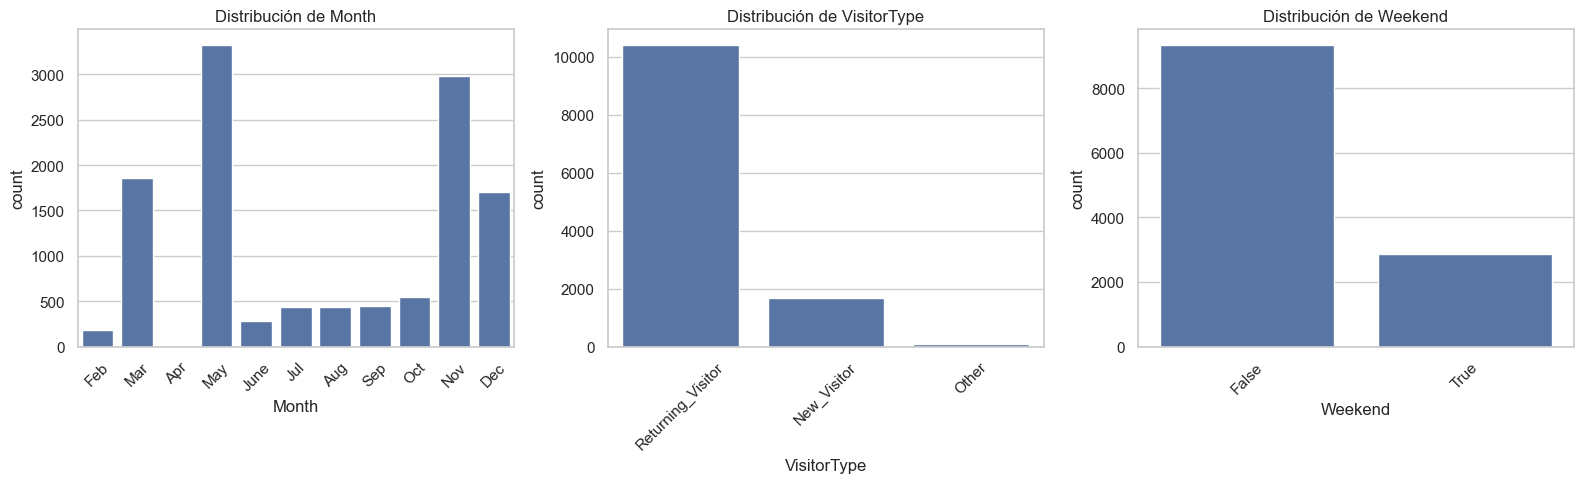


Frecuencia de Month:


,Frecuencia,Porcentaje (%)
Month,,
May,3329,27.275707
Nov,2982,24.432610
Mar,1860,15.239656
Dec,1706,13.977878
Oct,549,4.498156
Sep,448,3.670627
Aug,433,3.547726
Jul,432,3.539533
June,285,2.335109



Frecuencia de VisitorType:


,Frecuencia,Porcentaje (%)
VisitorType,,
Returning_Visitor,10431,85.464973
New_Visitor,1693,13.871364
Other,81,0.663662



Frecuencia de Weekend:


,Frecuencia,Porcentaje (%)
Weekend,,
False,9346,76.575174
True,2859,23.424826


In [6]:
# Identificar variables categóricas
cat_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# Analizar distribución de variables categóricas clave (Month, VisitorType, Weekend)
key_cat_cols = ['Month', 'VisitorType', 'Weekend']
plt.figure(figsize=(16, 5))
for i, col in enumerate(key_cat_cols):
    plt.subplot(1, 3, i+1)
    # Añadir los meses que faltan en la lista
    order = df_clean[col].value_counts().index if col != 'Month' else ['Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.countplot(x=col, data=df_clean, order=order)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

# Tablas de frecuencia para variables categóricas clave
for col in key_cat_cols:
    print(f"\nFrecuencia de {col}:")
    freq_table = df_clean[col].value_counts()
    percent_table = df_clean[col].value_counts(normalize=True) * 100
    display(pd.DataFrame({'Frecuencia': freq_table, 'Porcentaje (%)': percent_table}))


#### **Análisis de las variables categóricas**

Las variables categóricas nos proporcionan información contextual sobre cada sesión de navegación, revelando patrones temporales, características de los usuarios y aspectos técnicos.

**Observaciones principales:**

- **Month (Mes):**
  - Distribución variable a lo largo del año
  - Mayor actividad en Mayo, Noviembre y Marzo
  - Menor actividad en Febrero, Junio y Julio
  - Esta variación estacional es normal en comercio electrónico y puede estar relacionada con temporadas de compra específicas

- **VisitorType (Tipo de visitante):**
  - Predominio claro de visitantes recurrentes (~86%)
  - Nuevos visitantes representan solo ~14%
  - Pequeña proporción de "otros" tipos de visitantes
  - Este patrón sugiere una base de clientes establecida con una tasa moderada de adquisición de nuevos usuarios

- **Weekend (Fin de semana):**
  - Aproximadamente el 77% de las sesiones ocurren durante días laborables
  - El 23% ocurren en fines de semana
  - Esta distribución refleja los patrones típicos de tráfico web, donde los días laborables suelen tener mayor actividad

#### **Implicaciones para el negocio**

- Oportunidad para estrategias de marketing estacional en meses de mayor actividad
- Potencial para campañas específicas de adquisición de nuevos usuarios, dado su bajo porcentaje actual
- Posibilidad de promociones de fin de semana para aumentar la actividad durante estos días

Más adelante, analizaremos cómo estas variables categóricas se relacionan con la probabilidad de conversión (**Revenue**), lo que nos permitirá identificar segmentos de alto valor y oportunidades específicas.


#### **3.4 Identificación de outliers en variables numéricas claves**

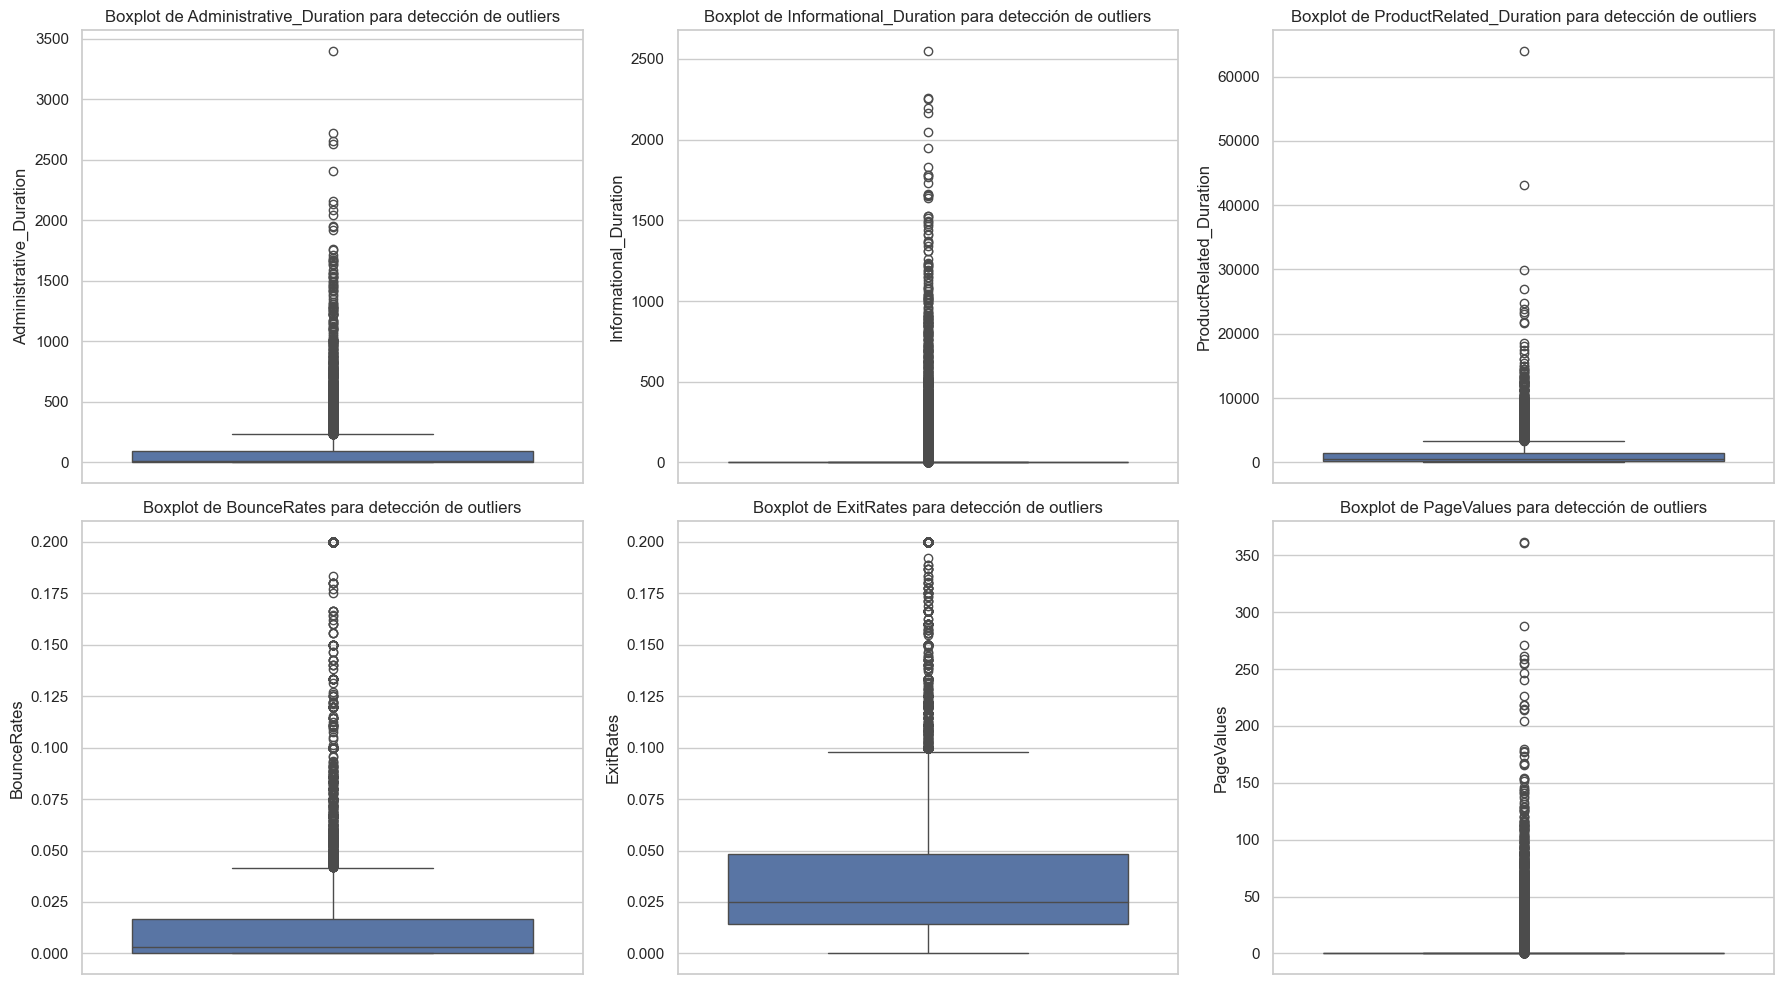

Resumen de detección de outliers:


,Q1,Q3,IQR,Lower_bound,Upper_bound,N_outliers,Pct_outliers
Administrative_Duration,0.0,94.7,94.7,-142.05,236.75,1149,9.414175
Informational_Duration,0.0,0.0,0.0,0.0,0.0,2405,19.705039
ProductRelated_Duration,193.0,1477.154762,1284.154762,-1733.232143,3403.386905,951,7.791889
BounceRates,0.0,0.016667,0.016667,-0.025,0.041667,1428,11.700123
ExitRates,0.014231,0.048529,0.034298,-0.037217,0.099977,1325,10.856206
PageValues,0.0,0.0,0.0,0.0,0.0,2730,22.367882


In [7]:
# Seleccionar variables numéricas principales para análisis de outliers
outlier_vars = ['Administrative_Duration', 'Informational_Duration',
                'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

# Crear boxplots para identificar outliers
plt.figure(figsize=(18, 10))
for i, var in enumerate(outlier_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df_clean[var])
    plt.title(f'Boxplot de {var} para detección de outliers')
    plt.tight_layout()
plt.show()

# Calcular estadísticas de outliers
outliers_summary = pd.DataFrame(index=outlier_vars,
                              columns=['Q1', 'Q3', 'IQR', 'Lower_bound', 'Upper_bound',
                                      'N_outliers', 'Pct_outliers'])

for var in outlier_vars:
    Q1 = df_clean[var].quantile(0.25)
    Q3 = df_clean[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[var] < lower_bound) | (df_clean[var] > upper_bound)].shape[0]
    pct_outliers = outliers / df_clean.shape[0] * 100

    outliers_summary.loc[var] = [Q1, Q3, IQR, lower_bound, upper_bound, outliers, pct_outliers]

print("Resumen de detección de outliers:")
display(outliers_summary)

#### **Análisis de los boxplots de variables numéricas**

Los boxplots revelan patrones extremadamente importantes sobre la distribución de nuestras variables numéricas, con implicaciones significativas para el negocio y el modelado.

**Observaciones detalladas:**

- **Distribuciones altamente concentradas cerca de cero:**
  - En todas las variables, la caja del boxplot (que representa el rango intercuartílico) está comprimida en la parte inferior del gráfico
  - El 75% de los datos (Q3) está muy cerca de cero en varias variables, especialmente en PageValues (Q3 = 0)
  - Esta característica explica por qué tantos valores se consideran outliers estadísticamente

- **Variables de duración:**
  - ProductRelated_Duration: Outliers extremos hasta ~63,000 segundos (17.5 horas)
  - Administrative_Duration: Valores atípicos hasta ~3,400 segundos
  - Informational_Duration: Outliers hasta ~2,500 segundos
  - En los tres casos, la mayoría de sesiones tienen duraciones muy cortas

- **Métricas de abandono:**
  - BounceRates y ExitRates: Distribución bimodal, con concentraciones en valores bajos y un grupo de outliers cercanos a 0.2 (el valor máximo)
  - La distribución de ExitRates muestra mayor variabilidad que BounceRates

- **PageValues:**
  - Más del 75% de los valores son exactamente 0 (Q1=0, Q3=0)
  - Outliers hasta ~360, que representan páginas con alto potencial de conversión
  - Esta distribución peculiar (mayoría en cero con unos pocos valores altos) explica su alto porcentaje de outliers (22.4%)

#### **Interpretación para el contexto de e-commerce**

- La alta concentración de valores cercanos a cero refleja el comportamiento típico de navegación web: la mayoría de las sesiones son breves y no generan valor inmediato
- Los outliers en este contexto no representan errores sino comportamientos de usuario significativos:
  - Usuarios altamente comprometidos: Reflejados en duraciones extremas
  - Usuarios con clara intención de compra: Representados por valores altos de PageValues
  - Comportamientos de abandono: Evidenciados por valores altos en tasas de rebote/salida

#### **Implicaciones para el análisis y modelado**

- No eliminar outliers: Representan segmentos valiosos de usuarios
- Considerar transformaciones: Transformaciones logarítmicas podrían normalizar estas distribuciones
- Análisis por segmentos: Evaluar separadamente usuarios típicos vs. outliers
- Variables derivadas: Crear indicadores binarios (ej. PageValues > 0) podría ser valioso

En la siguiente sección, examinaremos cómo estos outliers se relacionan con la probabilidad de conversión, lo que nos ayudará a determinar su valor predictivo.


## **4. Mapa de correlaciones entre variables**

#### **4.1 Matriz de correlación entre variables numéricas**

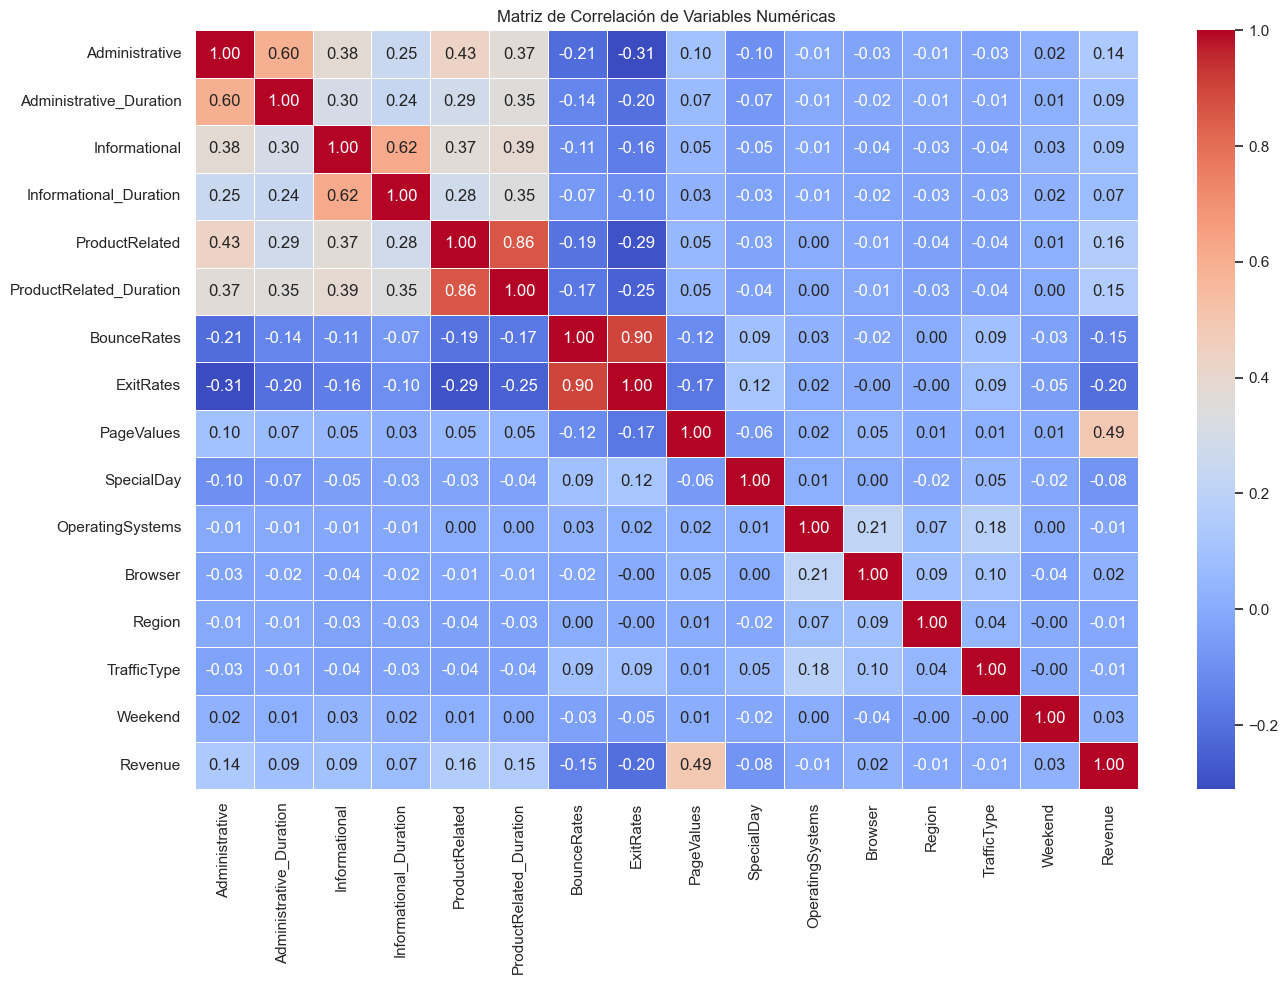

In [8]:
# Convertir variables booleanas a numéricas para incluirlas en la matriz de correlación
df_corr = df_clean.copy()
df_corr['Revenue'] = df_corr['Revenue'].astype(int)
df_corr['Weekend'] = df_corr['Weekend'].astype(int)

# Seleccionar variables numéricas + Weekend y Revenue
numeric_bool_cols = df_corr.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Crear matriz de correlación
correlation_matrix = df_corr[numeric_bool_cols].corr()

# Visualizar matriz de correlación con heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

#### **Mapa de correlaciones entre variables**

El análisis de correlaciones es un paso crítico para entender las relaciones entre variables y su potencial impacto en las conversiones. Este mapa nos permitirá identificar qué variables están más fuertemente asociadas con Revenue, así como detectar posibles problemas de multicolinealidad.

#### **Matriz de correlación general**

La matriz de correlación muestra el coeficiente de correlación de Pearson entre cada par de variables numéricas. Este valor oscila entre -1 (correlación negativa perfecta) y 1 (correlación positiva perfecta), donde 0 indica ausencia de correlación lineal.

**Observamos varios patrones importantes:**

- **Variables más correlacionadas con Revenue (ordenadas por magnitud):**
  - PageValues destaca significativamente con correlación positiva (aproximadamente 0.49)
  - ExitRates muestra correlación negativa (aproximadamente -0.20)
  - BounceRates también presenta correlación negativa (aproximadamente -0.15)
  - ProductRelated y ProductRelated_Duration tienen correlaciones positivas moderadas (aproximadamente 0.15-0.16)

- **Multicolinealidad entre predictores:**
  - Fuerte correlación entre BounceRates y ExitRates (aproximadamente 0.90)
  - Alta correlación entre ProductRelated y ProductRelated_Duration (aproximadamente 0.86)
  - Correlaciones significativas entre variables relacionadas (páginas visitadas y su duración correspondiente)

- **Variables con baja correlación con Revenue:**
  - Weekend muestra correlación muy débil
  - SpecialDay tiene correlación prácticamente nula
  - Variables técnicas como Browser y OperatingSystems también muestran correlaciones mínimas

Esta matriz proporciona nuestra primera visión cuantitativa de qué factores son más relevantes para predecir conversiones, y confirma algunas intuiciones del análisis univariado anterior.


#### **4.2 Correlaciones específicas con Revenue**


Correlaciones con Revenue (ordenadas):
Revenue                    1.000000
PageValues                 0.491894
ProductRelated             0.156042
ProductRelated_Duration    0.150077
Administrative             0.136330
Informational              0.093626
Administrative_Duration    0.091768
Informational_Duration     0.069358
Weekend                    0.027729
Browser                    0.024052
TrafficType               -0.005618
Region                    -0.012725
OperatingSystems          -0.014927
SpecialDay                -0.083601
BounceRates               -0.145091
ExitRates                 -0.204320
Name: Revenue, dtype: float64


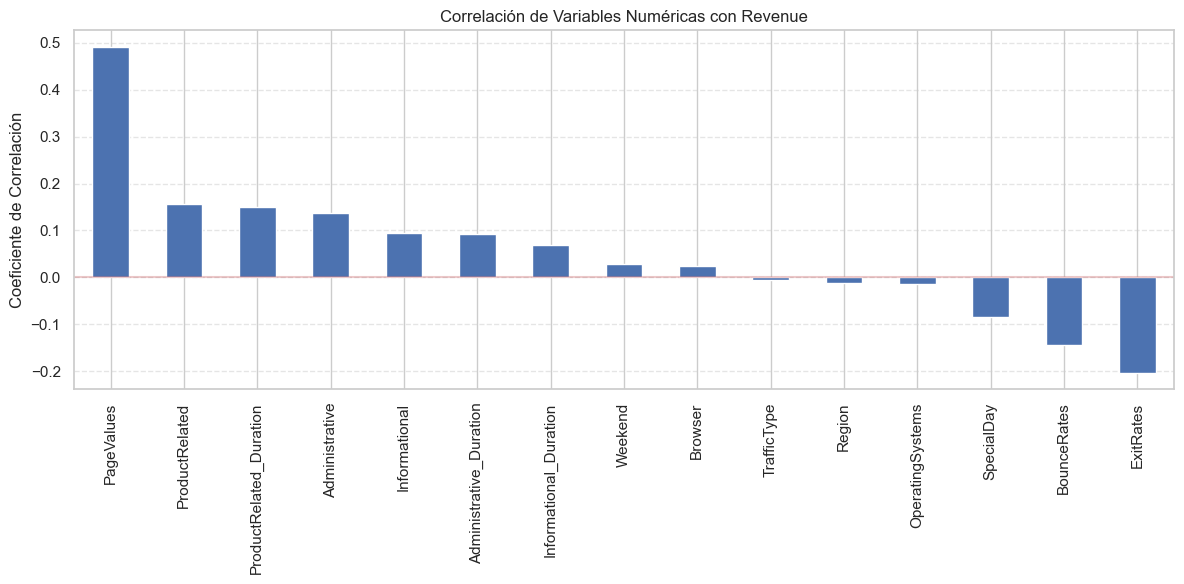

In [9]:
# Identificar las variables con mayor correlación con Revenue
revenue_correlations = correlation_matrix['Revenue'].sort_values(ascending=False)
print("\nCorrelaciones con Revenue (ordenadas):")
print(revenue_correlations)

# Visualizar las correlaciones más importantes con Revenue
plt.figure(figsize=(12, 6))
revenue_correlations.drop('Revenue').plot(kind='bar')
plt.title('Correlación de Variables Numéricas con Revenue')
plt.ylabel('Coeficiente de Correlación')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **Correlaciones específicas con Revenue**

El análisis detallado de las correlaciones con nuestra variable objetivo (Revenue) revela patrones cruciales para entender qué factores influyen más en las conversiones de e-commerce.

**Correlaciones ordenadas por relevancia:**

- **Correlación positiva alta (>0.4):**
  - PageValues (0.49): Destaca drásticamente como el predictor numérico más potente. Esta variable representa el valor promedio de una página que un usuario visita antes de completar una transacción e-commerce. Su fuerte correlación confirma que usuarios con intención de compra tienden a navegar por páginas de alto valor comercial.

- **Correlación positiva moderada (0.1-0.2):**
  - ProductRelated (0.16): El número de páginas relacionadas con productos visitadas muestra una correlación positiva significativa, indicando que la exploración activa del catálogo aumenta la probabilidad de compra.
  - ProductRelated_Duration (0.15): Tiempo dedicado a páginas de productos, con correlación similar a la frecuencia de visitas.
  - Administrative (0.14): Visitas a páginas administrativas (posiblemente carrito, información de cuenta) también contribuyen positivamente.

- **Correlación positiva débil (0.05-0.1):**
  - Informational (0.09) y Administrative_Duration (0.09): Muestran impacto positivo pero limitado.
  - Informational_Duration (0.07): La correlación más baja entre las variables de duración.

- **Correlación mínima (<0.05):**
  - Weekend (0.03) y Browser (0.02): Correlaciones positivas pero prácticamente insignificantes.
  - TrafficType (-0.006), Region (-0.01) y OperatingSystems (-0.01): Correlaciones negativas extremadamente débiles.

- **Correlación negativa significativa:**
  - SpecialDay (-0.08): Correlación negativa débil, sugiriendo que la proximidad a días festivos podría reducir ligeramente las conversiones.
  - BounceRates (-0.15): Correlación negativa moderada, confirmando que altas tasas de rebote reducen conversiones.
  - ExitRates (-0.20): La segunda correlación más fuerte (en valor absoluto), indica que las páginas frecuentemente abandonadas son detrimentales para conversiones.

#### **Interpretación de negocio**

- **Enfoque en valor percibido:**
  - La dominancia de PageValues (0.49) indica que el valor percibido de una página es crucial para convertir visitantes en compradores.
  - Las páginas que lideran a conversiones deben ser analizadas para replicar sus características en todo el sitio.

- **Importancia del engagement:**
  - La correlación positiva con variables de páginas visitadas (ProductRelated, Administrative) y su duración sugiere que mayor engagement se traduce en mayores conversiones.
  - Estrategias para aumentar el tiempo en sitio y exploración de productos podrían incrementar ventas.

- **Impacto de abandono:**
  - Las correlaciones negativas con ExitRates (-0.20) y BounceRates (-0.15) confirman que reducir abandonos es crítico.
  - Las páginas con altas tasas de salida deben ser rediseñadas o mejoradas.

- **Factores técnicos y contextuales:**
  - La baja correlación de Browser, OperatingSystems y Region sugiere que factores técnicos y demográficos no influyen significativamente en la decisión de compra.
  - Sorprendentemente, SpecialDay muestra correlación ligeramente negativa (-0.08), contrario a lo que podría esperarse en retail.

Esta jerarquía de correlaciones proporciona una base sólida para desarrollar estrategias de optimización y priorizar mejoras en el sitio de e-commerce, enfocándose en los factores de mayor impacto.


#### **4.3 Identificación de multicolinealidad**


Pares de variables altamente correlacionadas (|corr| >= 0.7):
BounceRates y ExitRates: 0.902
ProductRelated y ProductRelated_Duration: 0.860


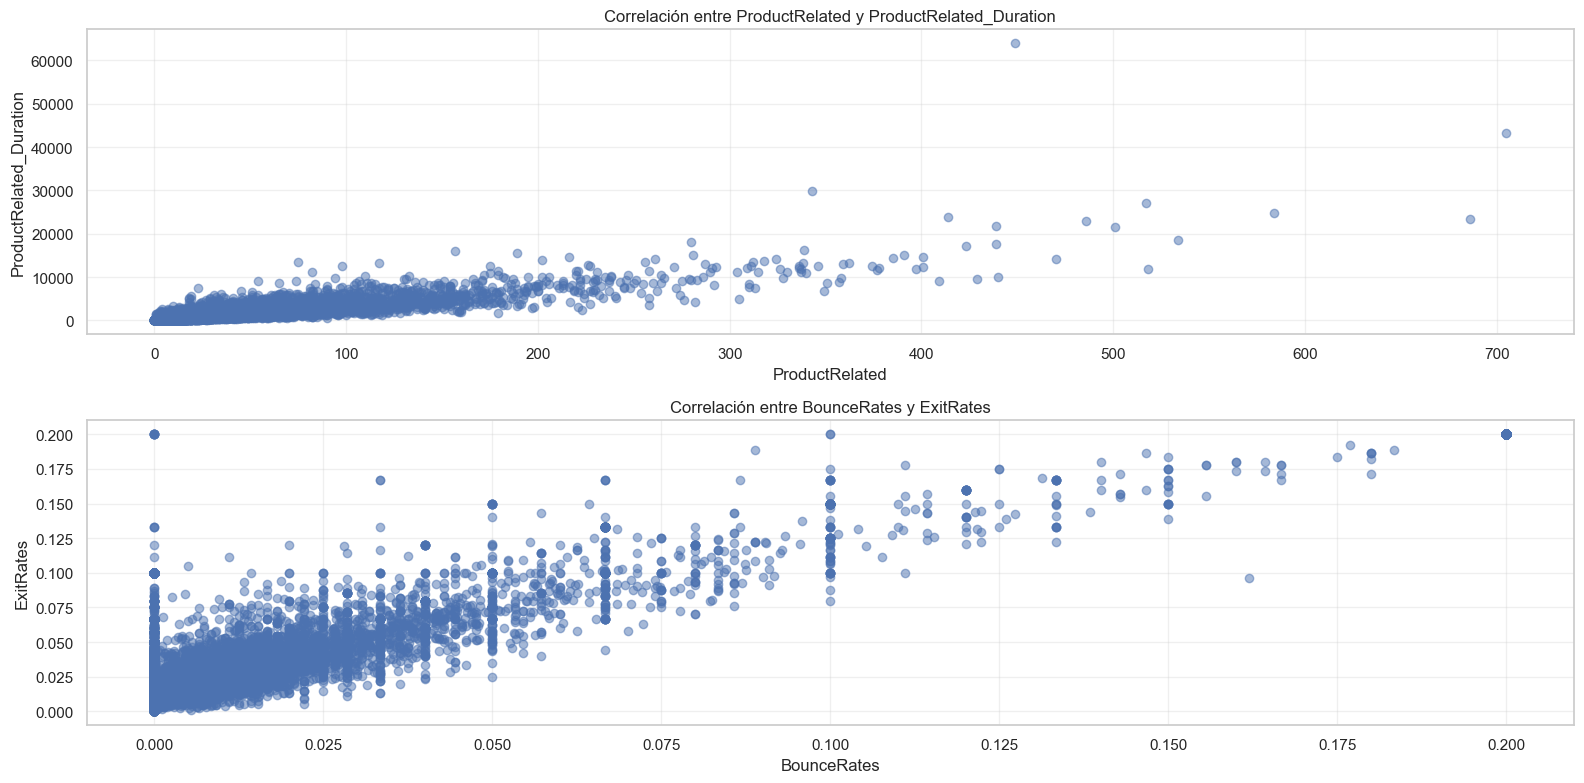

In [10]:
# Identificar pares de variables altamente correlacionadas (para evitar multicolinealidad)
high_corr_threshold = 0.7
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
   for j in range(i+1, len(correlation_matrix.columns)):
       if abs(correlation_matrix.iloc[i, j]) >= high_corr_threshold:
           high_corr_pairs.append(
               (correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j])
           )

print("\nPares de variables altamente correlacionadas (|corr| >= 0.7):")
for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
   print(f"{var1} y {var2}: {corr:.3f}")

# Visualización de correlaciones entre variables altamente correlacionadas
if high_corr_pairs:
   plt.figure(figsize=(16, 4 * len(high_corr_pairs)))
   for i, (var1, var2, _) in enumerate(high_corr_pairs):
       plt.subplot(len(high_corr_pairs), 1, i+1)
       plt.scatter(df_corr[var1], df_corr[var2], alpha=0.5)
       plt.title(f'Correlación entre {var1} y {var2}')
       plt.xlabel(var1)
       plt.ylabel(var2)
       plt.grid(True, alpha=0.3)
   plt.tight_layout()
   plt.show()

#### **Identificación de multicolinealidad**

La multicolinealidad (correlación alta entre predictores) puede afectar la estabilidad y la interpretación de los modelos predictivos. Al identificarla, podemos tomar decisiones fundamentadas sobre qué variables incluir o transformar en nuestro modelo.

**Pares con alta correlación:**

- **BounceRates y ExitRates:** Correlación extremadamente alta (~0.90)
  - Ambas miden comportamientos de abandono desde diferentes perspectivas.
  - *BounceRates:* salida inmediata sin interacción.
  - *ExitRates:* frecuencia con que una página es la última visitada.
  - **Recomendación:** Mantener *ExitRates* por su mayor correlación con *Revenue* (-0.20 vs -0.15).

- **ProductRelated y ProductRelated_Duration:** Correlación muy alta (~0.86)
  - Relación natural: más páginas visitadas = más tiempo total.
  - La relación no es perfectamente lineal debido a diferentes velocidades de navegación.
  - **Recomendación:** Considerar una transformación logarítmica de *ProductRelated_Duration*.

- **Administrativo/Informacional y sus duraciones:**
  - *Administrative* y *Administrative_Duration* (~0.60)
  - *Informational* e *Informational_Duration* (~0.62)
  - Correlaciones moderadas-altas pero por debajo del umbral crítico.

#### **Estrategias para gestionar la multicolinealidad**

- **Selección de variables:** Elegir solo una variable de cada par altamente correlacionado.
  - Para *BounceRates/ExitRates:* mantener *ExitRates*.
  - Para *ProductRelated/Duration:* transformar *ProductRelated_Duration*.

- **Creación de características derivadas:**
  - *Tiempo promedio por página:* Duration/Pages para cada categoría.
  - *Variables binarias:* indicadores de uso (ej. *ProductRelated* > 0).

- **Técnicas avanzadas (si fuera necesario):**
  - Análisis de componentes principales (PCA).
  - Regularización (*Ridge*, *Lasso*) en el modelado.

Esta identificación de multicolinealidad nos ayudará a crear un conjunto más eficiente de predictores, evitando información redundante que podría perjudicar nuestro modelo.  
Observamos que, a pesar de las altas correlaciones entre ciertas variables, no hay una correlación perfecta (1.0), lo que sugiere que cada variable aporta alguna información única que podría ser valiosa para la predicción.


## **5.5. Análisis bivariado orientado a negocio**

#### **5.1 Análisis de PageValues (la variable más predictiva) en relación con Revenue**

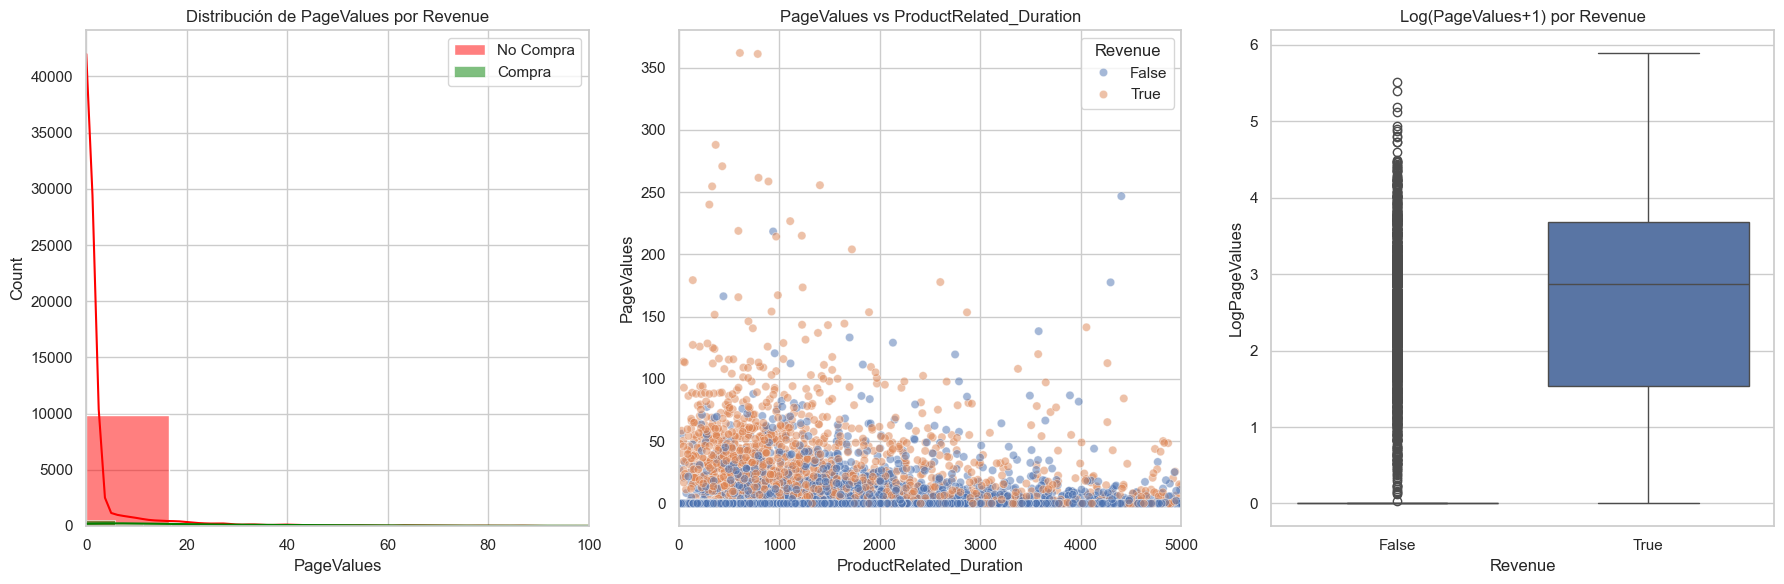

In [11]:
# Análisis de la variable más predictiva: PageValues
plt.figure(figsize=(18, 6))

# Histograma comparativo de PageValues por Revenue
plt.subplot(1, 3, 1)
sns.histplot(df_clean[df_clean['Revenue']==False]['PageValues'],
             kde=True, color='red', alpha=0.5, label='No Compra')
sns.histplot(df_clean[df_clean['Revenue']==True]['PageValues'],
             kde=True, color='green', alpha=0.5, label='Compra')
plt.title('Distribución de PageValues por Revenue')
plt.legend()
plt.xlim(0, 100)  # Limitar eje x para mejor visualización

# Gráfico de dispersión: PageValues vs ProductRelated_Duration con Revenue
plt.subplot(1, 3, 2)
sns.scatterplot(x='ProductRelated_Duration', y='PageValues',
                hue='Revenue', data=df_clean, alpha=0.5)
plt.title('PageValues vs ProductRelated_Duration')
plt.xlim(0, 5000)  # Limitar eje para mejor visualización

# Visualización logarítmica de PageValues para mejor detalle
plt.subplot(1, 3, 3)
# Añadir pequeña constante para manejar valores 0
df_clean['LogPageValues'] = np.log1p(df_clean['PageValues'])
sns.boxplot(x='Revenue', y='LogPageValues', data=df_clean)
plt.title('Log(PageValues+1) por Revenue')

plt.tight_layout()
plt.show()

#### **Análisis de PageValues en relación con Revenue**

*PageValues* emergió como el predictor numérico más potente en nuestro mapa de correlaciones (0.49). Los gráficos revelan patrones extraordinariamente claros que explican esta fuerte relación.

**Hallazgos principales:**

- **Distribución extremadamente diferenciada:**
  - *Sesiones sin compra:* Concentración casi total en *PageValues* = 0 (>10,000 casos).
  - *Sesiones con compra:* Aunque también hay valores en cero, existe una distribución más uniforme con muchos valores positivos.
  - Esta diferencia drástica explica la fuerte correlación positiva identificada en la sección 4.2.

- **Patrón en relación con duración:**
  - El gráfico de dispersión muestra que los valores altos de *PageValues* (>100) aparecen predominantemente en sesiones con compra (puntos naranja).
  - No hay relación clara entre *ProductRelated_Duration* y *PageValues*.
  - Valores altos de *PageValues* aparecen tanto en sesiones cortas (~500s) como largas (~4000s).

- **Transformación logarítmica revela contraste dramático:**
  - El boxplot de *Log(PageValues + 1)* muestra una diferencia excepcionalmente clara.
  - *Sesiones sin compra (False):* Mediana cercana a 0, con rango intercuartílico mínimo.
  - *Sesiones con compra (True):* Mediana aproximadamente 2.5, con amplio rango intercuartílico (1.5–3.5).
  - Esto sugiere la utilidad de transformar logarítmicamente esta variable para modelado.

#### **Implicaciones estratégicas**

- *PageValues* actúa como un **"predictor binario"** casi perfecto: valores positivos indican alta probabilidad de compra.
- Sería valioso crear una **variable derivada binaria** (ej. *PageValues_NonZero*) para capturar este patrón.
- Recomendamos implementar sistemas para reconocer patrones similares a los que generan valores altos de *PageValues*.
- Los casos atípicos (*outliers*) en sesiones sin compra pero con alto *PageValues* representan posibles **"compradores perdidos"** — usuarios con intención de compra que abandonaron el proceso.

Este análisis confirma que tanto *PageValues* como potencialmente una variable binaria derivada deberían ser componentes centrales de nuestro modelo predictivo final.


#### **5.2 Análisis de métricas de abandono (BounceRates y ExitRates) en relación con Revenue**

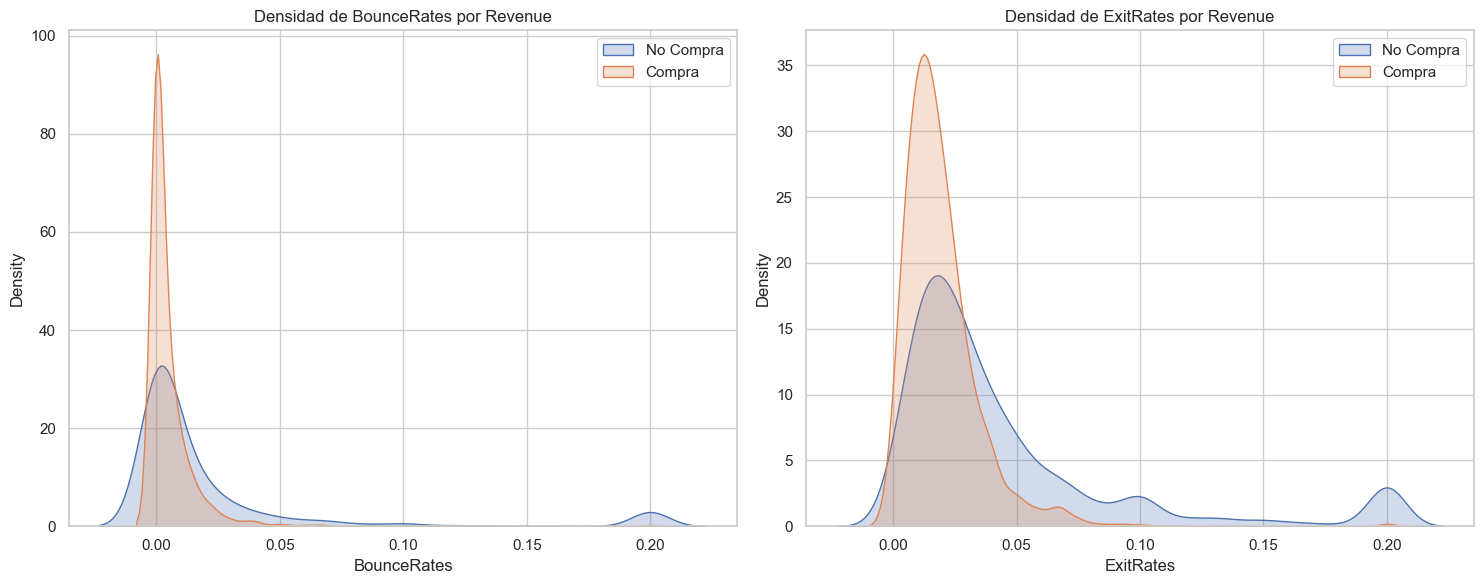


Estadísticas de tasas de rebote y salida por Revenue:


BounceRates           ExitRates          
               mean    median      mean    median
Revenue                                          
False      0.023197  0.003922  0.045526  0.028382
True       0.005117  0.000000  0.019555  0.016000

In [12]:
# Comparar distribución de BounceRates y ExitRates por Revenue
plt.figure(figsize=(15, 6))

# Densidad de BounceRates por Revenue
plt.subplot(1, 2, 1)
sns.kdeplot(df_clean[df_clean['Revenue']==False]['BounceRates'],
            label='No Compra', shade=True)
sns.kdeplot(df_clean[df_clean['Revenue']==True]['BounceRates'],
            label='Compra', shade=True)
plt.title('Densidad de BounceRates por Revenue')
plt.legend()

# Densidad de ExitRates por Revenue
plt.subplot(1, 2, 2)
sns.kdeplot(df_clean[df_clean['Revenue']==False]['ExitRates'],
            label='No Compra', shade=True)
sns.kdeplot(df_clean[df_clean['Revenue']==True]['ExitRates'],
            label='Compra', shade=True)
plt.title('Densidad de ExitRates por Revenue')
plt.legend()

plt.tight_layout()
plt.show()

# Estadísticas descriptivas por grupo
bounce_exit_stats = df_clean.groupby('Revenue')[['BounceRates', 'ExitRates']].agg(['mean', 'median'])
print("\nEstadísticas de tasas de rebote y salida por Revenue:")
display(bounce_exit_stats)

#### **Análisis de métricas de abandono en relación con Revenue**

Las tasas de abandono (*BounceRates* y *ExitRates*) mostraron correlaciones negativas significativas con *Revenue* en nuestro mapa de correlaciones (-0.15 y -0.20 respectivamente). Analizamos cómo estas variables se distribuyen entre sesiones con y sin compra.

**Patrones observados:**

- **BounceRates:**
  - *Sesiones con compra:* Distribución extremadamente concentrada cerca de cero (media: ~0.005).
  - *Sesiones sin compra:* Media mucho más alta (~0.023) y distribución más dispersa.
  - La diferencia es muy significativa: tasas de rebote casi 5 veces mayores en sesiones sin compra.

- **ExitRates:**
  - Patrón similar pero menos pronunciado que *BounceRates*.
  - *Sesiones con compra:* Media de ~0.020.
  - *Sesiones sin compra:* Media de ~0.046 (más del doble).

- **Comportamiento multimodal en sesiones sin compra:**
  - Picos secundarios visibles en valores más altos.
  - Sugiere diferentes patrones de abandono en usuarios que no compran.

- **Diferencia en medianas aún más drástica:**
  - *BounceRates:* Mediana exactamente 0 para sesiones con compra vs. valores positivos para no compra.
  - Muestra que la mayoría de compradores no abandonan el sitio inmediatamente.

#### **Implicaciones para estrategias de negocio**

- **Optimización de páginas de entrada:**
  - Reducir *BounceRates* podría aumentar significativamente conversiones.
  - Mejorar primeras impresiones, tiempo de carga y contenido inicial.

- **Análisis de flujo de usuario:**
  - Identificar páginas con altas *ExitRates* y optimizarlas.
  - Implementar estrategias de retención en puntos de abandono comunes (cross-selling, llamadas a la acción).

- **Indicadores tempranos de compra:**
  - Tasas de rebote y salida cercanas a cero son fuertes predictores de posible conversión.
  - Podrían usarse para calificar leads y priorizar estrategias de marketing.

Este análisis justifica la inclusión de *ExitRates* como variable clave en nuestro modelo final, mientras que *BounceRates* podría excluirse debido a su alta correlación con *ExitRates* (0.90) identificada en la sección 4.3.


#### **5.3 Análisis de comportamiento de navegación en relación con Revenue**

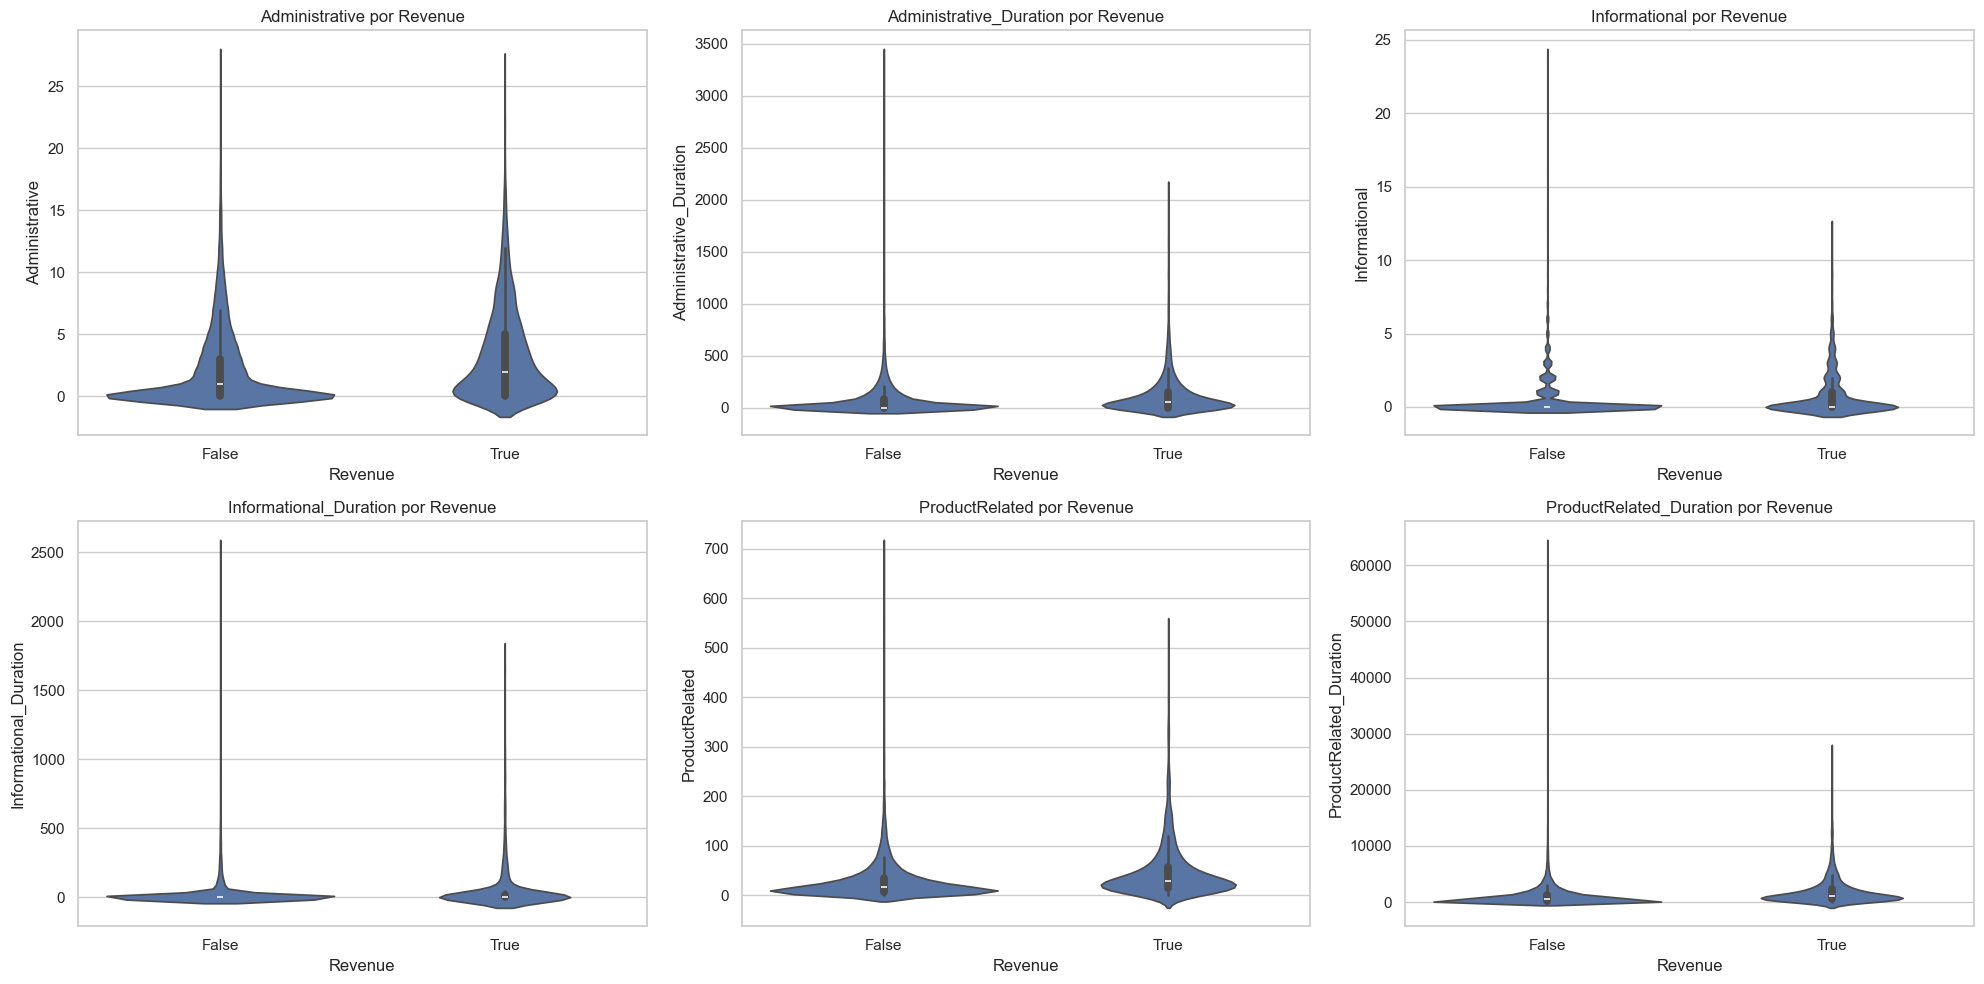


Estadísticas de métricas de uso por Revenue:


Administrative        Administrative_Duration             \
                  mean median                    mean     median   
Revenue                                                            
False         2.143440    1.0               74.635276   0.000000   
True          3.393606    2.0              119.483244  52.366667   

        Informational        Informational_Duration        ProductRelated  \
                 mean median                   mean median           mean   
Revenue                                                                     
False        0.457318    0.0              30.603289    0.0      29.050403   
True         0.786164    0.0              57.611427    0.0      48.210168   

               ProductRelated_Duration              
        median                    mean      median  
Revenue                                             
False     16.0             1082.976881   526.00000  
True      29.0             1876.209615  1109.90625

In [13]:
# Variables de comportamiento a analizar
usage_vars = ['Administrative', 'Administrative_Duration',
              'Informational', 'Informational_Duration',
              'ProductRelated', 'ProductRelated_Duration']

# Crear violin plots para cada variable
plt.figure(figsize=(20, 10))
for i, var in enumerate(usage_vars):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='Revenue', y=var, data=df_clean)
    plt.title(f'{var} por Revenue')
plt.tight_layout()
plt.show()

# Estadísticas descriptivas por grupo
usage_stats = df_clean.groupby('Revenue')[usage_vars].agg(['mean', 'median'])
print("\nEstadísticas de métricas de uso por Revenue:")
display(usage_stats)

#### **Análisis del comportamiento de navegación en relación con Revenue**

Los gráficos de violín revelan patrones distintivos de navegación entre sesiones con y sin compra, ofreciendo *insights* valiosos sobre cómo el comportamiento de los usuarios se relaciona con la probabilidad de conversión.

**Hallazgos por categoría de página:**

- **Páginas administrativas (*Administrative*, *Administrative_Duration*):**
  - Los violines muestran distribuciones similares en forma pero con mayor concentración en valores más altos para sesiones con compra.
  - La mediana es notablemente más alta para sesiones con compra (2.0 vs 1.0 páginas).
  - En *Administrative_Duration*, la diferencia es aún más pronunciada (52.4 vs 0.0 segundos de mediana).

- **Páginas informativas (*Informational*, *Informational_Duration*):**
  - Ambos grupos muestran alta concentración cercana a cero, con medianas bajas.
  - Aunque la forma es similar, las sesiones con compra muestran mayor densidad en valores ligeramente más altos.
  - La diferencia es pequeña pero consistente (medianas: 0.0 para ambos grupos, pero medias más altas para compras).

- **Páginas de productos (*ProductRelated*, *ProductRelated_Duration*):**
  - Diferencia más visual: la forma del violín es más ancha en valores intermedios para sesiones con compra.
  - Notable diferencia en medianas (29.0 vs 16.0 páginas) y distribución general.
  - En *ProductRelated_Duration*, las sesiones con compra muestran una distribución más extendida hacia valores altos.

**Características de las distribuciones:**

- **Asimetría pronunciada:** Todas las variables muestran distribuciones altamente sesgadas hacia valores bajos.
- **Outliers significativos:** Presentes en ambos grupos pero con valores extremos similares.
- **Mayor variabilidad en compradores:** Las distribuciones de sesiones con compra tienden a mostrar mayor dispersión.

#### **Recomendaciones para optimización**

- **Facilitar exploración de productos:**
  - Los datos confirman que mayor exploración de productos se asocia con conversiones.
  - Implementar mejores sistemas de navegación, filtros y recomendaciones personalizadas.
  - Optimizar la experiencia móvil para facilitar la exploración extensiva.

- **Mejorar flujo administrativo:**
  - Dado que los compradores pasan significativamente más tiempo en páginas administrativas, evaluar posibles fricciones.
  - Optimizar el proceso de *checkout* y formularios para reducir abandonos.
  - Considerar implementar opciones como "compra con un clic" para usuarios recurrentes.

- **Transformaciones para modelado:**
  - La alta asimetría en todas estas variables sugiere que transformaciones logarítmicas podrían ser beneficiosas.
  - Crear variables adicionales como "tiempo promedio por página" podría capturar comportamientos de alta conversión.

El análisis de estos patrones de navegación sugiere que el nivel de compromiso y exploración dentro del sitio es un fuerte predictor de la intención de compra, justificando la inclusión de estas variables en nuestro modelo predictivo.


#### **5.4 Análisis de variables categóricas en relación con Revenue**

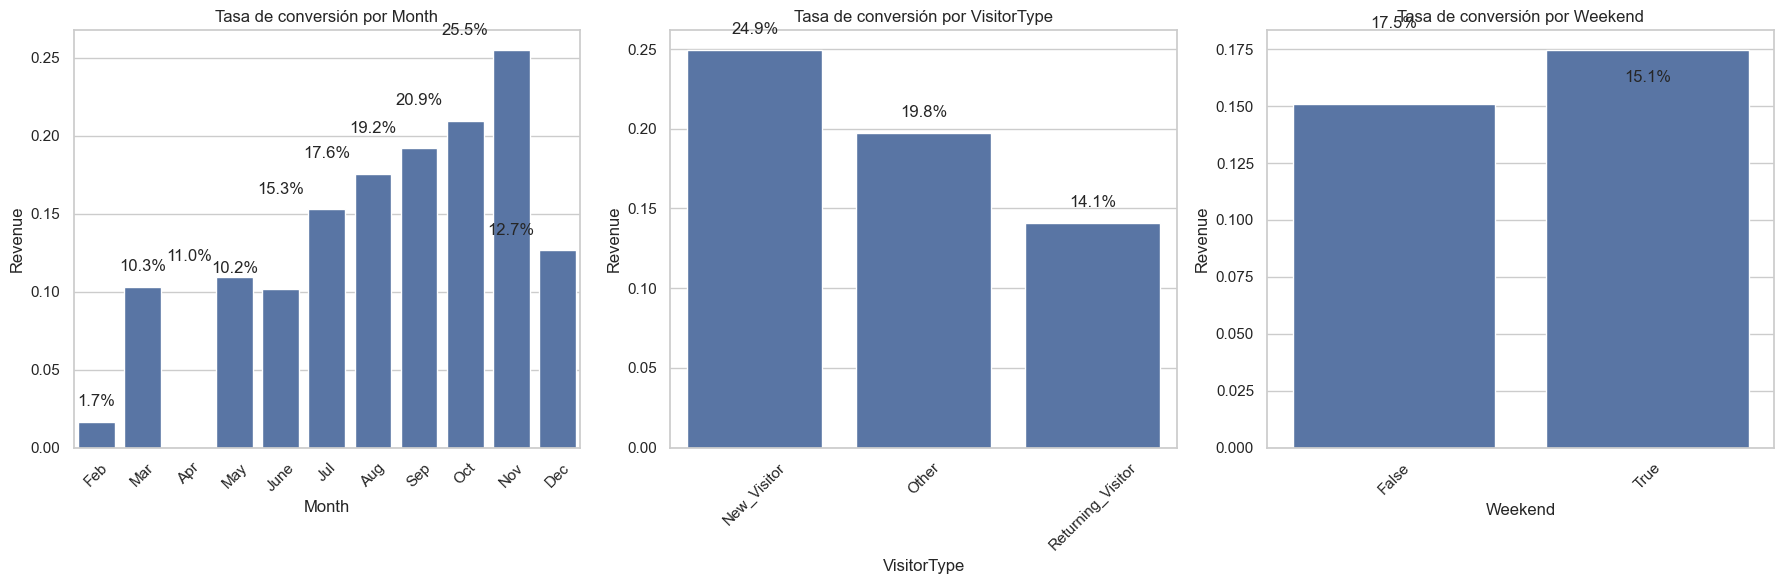


Tabla de contingencia para Month:


Revenue,False,True
Month,,
Aug,82.448037,17.551963
Dec,87.338804,12.661196
Feb,98.342541,1.657459
Jul,84.722222,15.277778
June,89.824561,10.175439
Mar,89.677419,10.322581
May,89.035746,10.964254
Nov,74.513749,25.486251
Oct,79.052823,20.947177



Tabla de contingencia para VisitorType:


Revenue,False,True
VisitorType,,
New_Visitor,75.073833,24.926167
Other,80.246914,19.753086
Returning_Visitor,85.907391,14.092609



Tabla de contingencia para Weekend:


Revenue,False,True
Weekend,,
False,84.924032,15.075968
True,82.546345,17.453655


In [14]:
# Variables categóricas a analizar
cat_vars = ['Month', 'VisitorType', 'Weekend']

plt.figure(figsize=(18, 6))
for i, var in enumerate(cat_vars):
    plt.subplot(1, 3, i+1)
    # Calcular porcentaje de conversión por categoría
    conversion_rate = df_clean.groupby(var)['Revenue'].mean().reset_index()
    conversion_rate = conversion_rate.sort_values('Revenue', ascending=False)

    # Orden específico para Month
    if var == 'Month':
        month_order = ['Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        conversion_rate['Month'] = pd.Categorical(conversion_rate['Month'], categories=month_order)
        conversion_rate = conversion_rate.sort_values('Month')

    # Graficar tasa de conversión
    sns.barplot(x=var, y='Revenue', data=conversion_rate)
    plt.title(f'Tasa de conversión por {var}')
    plt.xticks(rotation=45)

    # Añadir etiquetas de porcentaje
    for j, v in enumerate(conversion_rate['Revenue']):
        plt.text(j, v + 0.01, f"{v:.1%}", ha='center')

plt.tight_layout()
plt.show()

# Tablas de contingencia para variables categóricas vs Revenue
for var in cat_vars:
    print(f"\nTabla de contingencia para {var}:")
    contingency_table = pd.crosstab(df_clean[var], df_clean['Revenue'],
                                   normalize='index') * 100
    display(contingency_table)

#### **Análisis de variables categóricas en relación con Revenue**

El análisis de las variables categóricas revela patrones significativos que pueden aprovecharse para estrategias de marketing personalizadas y optimización del sitio.

**Patrones estacionales y temporales:**

- **Mes (*Month*):**
  - Estacionalidad extremadamente marcada: noviembre (25.5%) lidera claramente, seguido por octubre (20.9%) y septiembre (19.2%).
  - Contraste dramático: la diferencia entre el mejor mes (noviembre, 25.5%) y el peor (enero, 1.7%) es de más de 14 veces.
  - Progresión clara: aumento gradual de conversiones de julio a noviembre, seguido de una caída en diciembre.
  - Los primeros meses del año muestran tasas significativamente más bajas.

- **Tipo de visitante (*VisitorType*):**
  - Nuevos visitantes muestran tasa de conversión notablemente mayor (24.9%) que visitantes recurrentes (14.1%).
  - La categoría "Other" presenta un valor intermedio (19.8%).
  - Este hallazgo contradice la intuición común de que los visitantes recurrentes convierten mejor.

- **Fin de semana (*Weekend*):**
  - Ligera pero consistente ventaja para fines de semana (17.5% vs 15.1%).
  - La diferencia de 2.4 puntos porcentuales representa aproximadamente un 16% más de conversiones durante fines de semana.

#### **Recomendaciones estratégicas**

- **Capitalizar la estacionalidad:**
  - Concentrar presupuesto publicitario y campañas en el trimestre septiembre-noviembre.
  - Implementar promociones especiales en enero-abril para impulsar ventas en temporada baja.
  - Crear una variable derivada de "temporada alta" (sep-nov) para el modelado.

- **Optimizar para nuevos visitantes:**
  - Mejorar experiencia de primer uso y *landing pages*.
  - Investigar por qué los visitantes recurrentes convierten menos (¿problemas de fidelización?).
  - Desarrollar estrategias específicas para reactivar visitantes recurrentes.

- **Ajustar estrategia por día de semana:**
  - Considerar promociones específicas para fines de semana.
  - Evaluar si la diferencia se debe a comportamiento de usuario o a factores del sitio.
  - Optimizar experiencia para usuarios de fin de semana que podrían tener más tiempo para explorar.

La combinación de estos factores categóricos sugiere oportunidades de segmentación avanzada, como centrarse especialmente en nuevos visitantes durante la temporada alta y fines de semana, donde podríamos esperar tasas de conversión excepcionales.


## **6. Segmentación de usuarios y análisis multivariado**

#### **6.1 Creación de características derivadas clave**

In [15]:
df_derived = df_clean.copy()

# 1. Transformaciones logarítmicas para variables de duración
df_derived['Administrative_Duration_Log'] = np.log1p(df_derived['Administrative_Duration'])
df_derived['Informational_Duration_Log'] = np.log1p(df_derived['Informational_Duration'])
df_derived['ProductRelated_Duration_Log'] = np.log1p(df_derived['ProductRelated_Duration'])

# 2. Variable binaria para PageValues
df_derived['PageValues_NonZero'] = (df_derived['PageValues'] > 0).astype(int)

# 3. Variable de temporada alta (Sep-Nov)
high_season = ['Sep', 'Oct', 'Nov']
df_derived['HighSeason'] = df_derived['Month'].isin(high_season).astype(int)

# 4. Total de páginas y duración (métricas agregadas simples)
df_derived['TotalPages'] = df_derived['Administrative'] + df_derived['Informational'] + df_derived['ProductRelated']
df_derived['TotalDuration'] = df_derived['Administrative_Duration'] + df_derived['Informational_Duration'] + df_derived['ProductRelated_Duration']

# Mostrar estadísticas básicas de las nuevas variables
print("\nEstadísticas de características derivadas:")
derived_cols = ['Administrative_Duration_Log', 'Informational_Duration_Log',
                'ProductRelated_Duration_Log', 'PageValues_NonZero', 'HighSeason',
                'TotalPages', 'TotalDuration']
display(df_derived[derived_cols].describe())

# Correlación de las nuevas características con Revenue
derived_corr = df_derived[derived_cols + ['Revenue']].corr()['Revenue'].sort_values(ascending=False)
print("\nCorrelación de características derivadas con Revenue:")
print(derived_corr)


Estadísticas de características derivadas:


,Administrative_Duration_Log,Informational_Duration_Log,ProductRelated_Duration_Log,PageValues_NonZero,HighSeason,TotalPages,TotalDuration
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.330280,0.852978,6.023596,0.223679,0.326014,34.893240,1323.454242
std,2.365393,1.823651,1.961914,0.416726,0.468772,46.627336,2043.871589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.267858,0.000000,0.000000,9.000000,231.666667
50%,2.302585,0.000000,6.413365,0.000000,0.000000,20.000000,690.958333
75%,4.561218,0.000000,7.298550,0.000000,1.000000,42.000000,1643.958333
max,8.131457,7.843996,11.066240,1.000000,1.000000,746.000000,69921.647230



Correlación de características derivadas con Revenue:
Revenue                        1.000000
PageValues_NonZero             0.601621
ProductRelated_Duration_Log    0.196202
Administrative_Duration_Log    0.163219
HighSeason                     0.163143
TotalPages                     0.161535
TotalDuration                  0.153720
Informational_Duration_Log     0.110951
Name: Revenue, dtype: float64


#### **Creación de características derivadas clave**

Hemos creado un conjunto simplificado de características derivadas que capturan los aspectos más importantes del comportamiento de usuario sin sobrecomplicar el análisis.

**Variables transformadas y derivadas:**

- **Transformaciones logarítmicas:**
  - Las variables de duración muestran distribuciones muy sesgadas, como vimos en la sección 3.4.
  - La transformación logarítmica (*log(x+1)*) reduce esta asimetría y hace las variables más adecuadas para modelado.
  - *ProductRelated_Duration_Log* muestra la correlación más alta (0.196) de las tres variables transformadas.

- **Indicador *PageValues_NonZero*:**
  - Esta variable binaria tiene la correlación más alta con *Revenue* (0.602) de todas las características derivadas.
  - Confirma el hallazgo del punto 5.1 donde observamos que *PageValues* actúa casi como un "predictor binario".
  - Su alta correlación sugiere que será un predictor extremadamente valioso.

- **Indicador de temporada alta (*HighSeason*):**
  - Correlación significativa con *Revenue* (0.163), similar a *ProductRelated_Duration_Log*.
  - Captura el efecto estacional que observamos en la sección 5.4.
  - Simplifica la información mensual, pero puede no capturar bien la estacionalidad.

- **Variables agregadas:**
  - *TotalPages* y *TotalDuration* muestran correlaciones positivas (0.162 y 0.154 respectivamente).
  - Proporcionan una visión agregada del comportamiento de navegación.

#### **Jerarquía de importancia predictiva**

- **PageValues_NonZero** (0.602) – Predictor dominante.
- **ProductRelated_Duration_Log** (0.196) – Segunda variable más predictiva.
- **Administrative_Duration_Log** (0.163) y **HighSeason** (0.163) – Igual importancia.
- **TotalPages** (0.162) y **TotalDuration** (0.154) – Métricas agregadas relevantes.
- **Informational_Duration_Log** (0.111) – Menor contribución relativa.

Este conjunto reducido de características derivadas proporciona una buena combinación de poder predictivo, interpretabilidad y simplicidad. En la siguiente sección, analizaremos cómo estas variables interactúan con *Revenue* y entre sí.


#### **6.2 Análisis de segmentos de alto valor basados en engagement (TotalPages y TotalDuration)**


Análisis de segmentos basados en patrones de engagement:


,Segmento,Tamaño,% del Total,Tasa de Conversión (%)
0,Alto número de páginas y tiempo prolongado,5145,42.154855,23.440233
1,Alto número de páginas pero tiempo corto,934,7.652601,12.526767
2,Bajo número de páginas pero tiempo prolongado,957,7.841049,17.659352
3,Bajo número de páginas y tiempo corto,5169,42.351495,8.047978


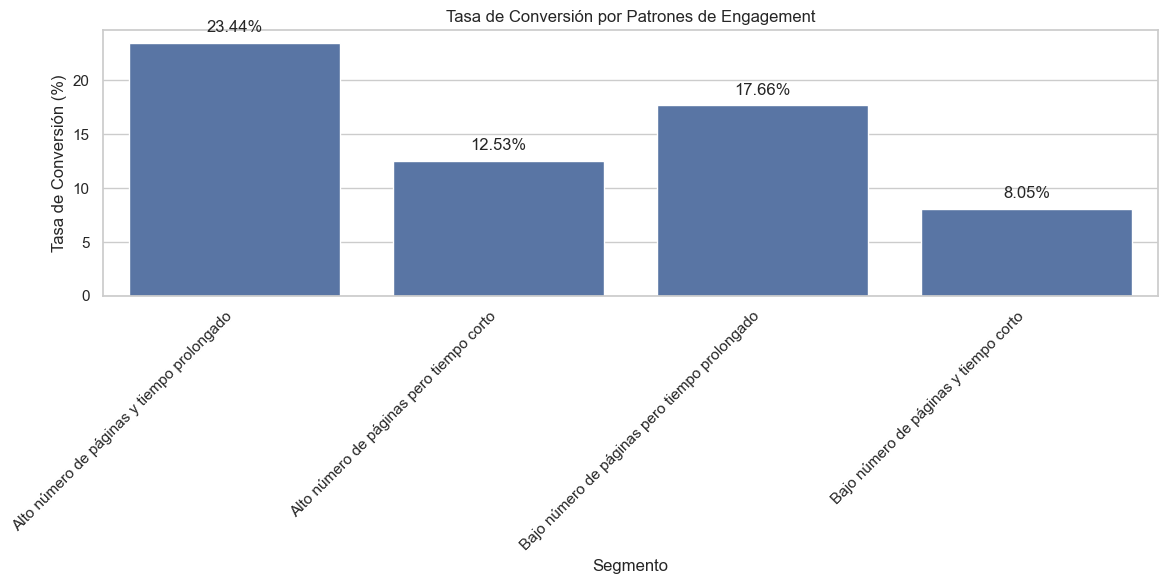


Análisis de segmentos combinando engagement y PageValues:


,Segmento,Tamaño,% del Total,Tasa de Conversión (%)
0,Alto engagement con PageValues > 0,2050,16.796395,49.073171
1,Alto engagement con PageValues = 0,3095,25.358460,6.462036
2,Bajo engagement con PageValues > 0,357,2.925031,82.352941
3,Bajo engagement con PageValues = 0,4812,39.426465,2.535328


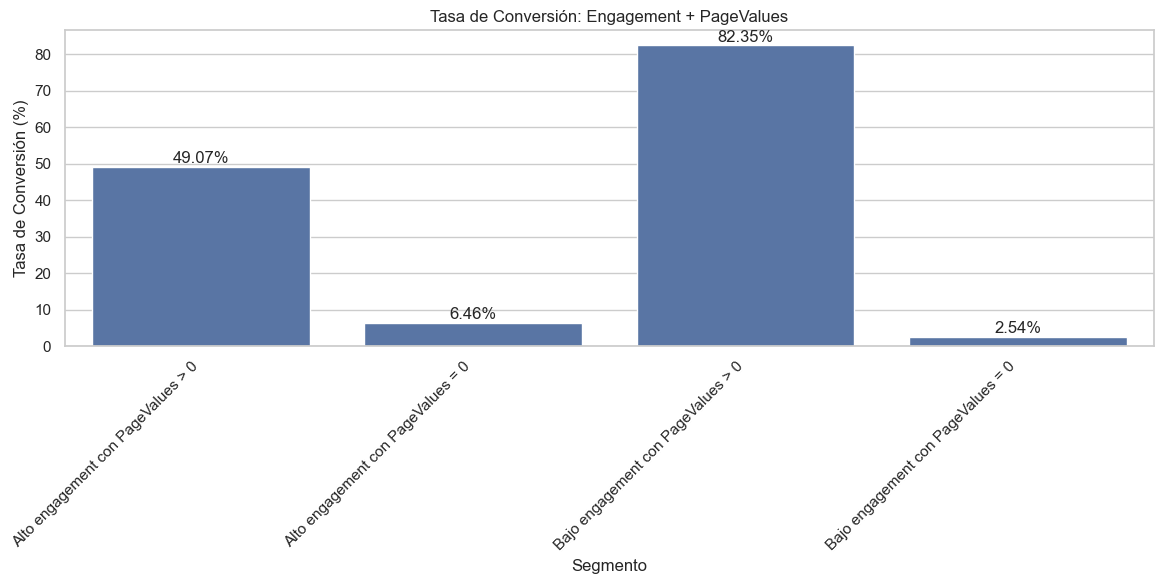

In [16]:
# Crear indicadores binarios basados en medianas
pages_median = df_derived['TotalPages'].median()
duration_median = df_derived['TotalDuration'].median()

df_derived['HighPages'] = (df_derived['TotalPages'] > pages_median).astype(int)
df_derived['HighDuration'] = (df_derived['TotalDuration'] > duration_median).astype(int)

# Definir segmentos de engagement
engagement_segments = [
    ('Alto número de páginas y tiempo prolongado',
     (df_derived['HighPages'] == 1) & (df_derived['HighDuration'] == 1)),
    
    ('Alto número de páginas pero tiempo corto',
     (df_derived['HighPages'] == 1) & (df_derived['HighDuration'] == 0)),
    
    ('Bajo número de páginas pero tiempo prolongado',
     (df_derived['HighPages'] == 0) & (df_derived['HighDuration'] == 1)),
    
    ('Bajo número de páginas y tiempo corto',
     (df_derived['HighPages'] == 0) & (df_derived['HighDuration'] == 0))
]

# Analizar tasas de conversión por segmentos
print("\nAnálisis de segmentos basados en patrones de engagement:")
segment_stats = []
for name, mask in engagement_segments:
    segment_size = mask.sum()
    segment_pct = segment_size / len(df_derived) * 100
    conversion_rate = df_derived.loc[mask, 'Revenue'].mean() * 100
    segment_stats.append([name, segment_size, segment_pct, conversion_rate])

segment_df = pd.DataFrame(segment_stats,
                         columns=['Segmento', 'Tamaño', '% del Total', 'Tasa de Conversión (%)'])
display(segment_df)

# Visualizar tasas de conversión por segmentos
plt.figure(figsize=(12, 6))
sns.barplot(x='Segmento', y='Tasa de Conversión (%)', data=segment_df)
plt.title('Tasa de Conversión por Patrones de Engagement')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, v in enumerate(segment_df['Tasa de Conversión (%)']):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.show()

# Combinar con PageValues para un análisis más profundo
combined_segments = [
    ('Alto engagement con PageValues > 0',
     (df_derived['HighPages'] == 1) & (df_derived['HighDuration'] == 1) & (df_derived['PageValues'] > 0)),
    
    ('Alto engagement con PageValues = 0',
     (df_derived['HighPages'] == 1) & (df_derived['HighDuration'] == 1) & (df_derived['PageValues'] == 0)),
    
    ('Bajo engagement con PageValues > 0',
     (df_derived['HighPages'] == 0) & (df_derived['HighDuration'] == 0) & (df_derived['PageValues'] > 0)),
    
    ('Bajo engagement con PageValues = 0',
     (df_derived['HighPages'] == 0) & (df_derived['HighDuration'] == 0) & (df_derived['PageValues'] == 0))
]

# Analizar tasas de conversión por segmentos combinados
print("\nAnálisis de segmentos combinando engagement y PageValues:")
combined_stats = []
for name, mask in combined_segments:
    segment_size = mask.sum()
    segment_pct = segment_size / len(df_derived) * 100
    conversion_rate = df_derived.loc[mask, 'Revenue'].mean() * 100
    combined_stats.append([name, segment_size, segment_pct, conversion_rate])

combined_df = pd.DataFrame(combined_stats,
                          columns=['Segmento', 'Tamaño', '% del Total', 'Tasa de Conversión (%)'])
display(combined_df)

# Visualizar tasas de conversión por segmentos combinados
plt.figure(figsize=(12, 6))
sns.barplot(x='Segmento', y='Tasa de Conversión (%)', data=combined_df)
plt.title('Tasa de Conversión: Engagement + PageValues')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, v in enumerate(combined_df['Tasa de Conversión (%)']):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.show()

#### **Análisis de segmentos de alto valor basados en engagement**
El análisis de segmentos basados en patrones de engagement revela diferencias significativas en las tasas de conversión y oportunidades para estrategias de marketing dirigidas.

**Segmentos por patrones de engagement:**
- **Alto número de páginas y tiempo prolongado:**
  - Tasa de conversión más elevada: 23.44%.
  - Representa un segmento considerable (42.15% del total).
  - Usuarios que exploran extensivamente el sitio y dedican tiempo sustancial.
  - Segmento de mayor valor basado únicamente en comportamiento de navegación.

- **Bajo número de páginas pero tiempo prolongado:**
  - Tasa de conversión significativa: 17.66%.
  - Segmento pequeño (7.84% del total).
  - Usuarios que profundizan en pocos productos, mostrando interés concentrado.
  - Potencial oportunidad para recomendaciones complementarias.

- **Alto número de páginas pero tiempo corto:**
  - Tasa de conversión moderada: 12.53%.
  - Comportamiento de "exploración rápida" (7.65% del total).
  - Usuarios que examinan muchos productos pero dedican poco tiempo a cada uno.
  - Candidatos para herramientas de comparación y filtrado mejoradas.

- **Bajo número de páginas y tiempo corto:**
  - Tasa de conversión mínima: 8.05%.
  - Segmento grande (42.35% del total).
  - Usuarios con mínimo engagement, probablemente en fase inicial de exploración.
  - Representa la mayor oportunidad de mejora por su tamaño.

**Interacción con PageValues:**
- **Bajo engagement con PageValues > 0:**
  - Tasa de conversión extraordinaria: 82.35%.
  - Segmento muy pequeño pero valioso (2.93% del total).
  - Usuarios que, a pesar de navegar poco, muestran clara intención de compra.
  - El valor de PageValues supera ampliamente al comportamiento de navegación.

- **Alto engagement con PageValues > 0:**
  - Tasa de conversión muy alta: 49.07%.
  - Segmento significativo (16.80% del total).
  - Combinación poderosa de alto compromiso e intención de compra.
  - Segmento prioritario para optimización y personalización.

- **Alto engagement con PageValues = 0:**
  - Tasa de conversión sorprendentemente baja: 6.46%.
  - Segmento considerable (25.36% del total).
  - Demuestra que el engagement alto sin intención de compra no conduce a conversiones.
  - Oportunidad para mejorar la relevancia de contenido.

- **Bajo engagement con PageValues = 0:**
  - Tasa de conversión mínima: 2.54%.
  - Segmento más grande (39.43% del total).
  - Usuarios con mínima probabilidad de compra inmediata.
  - Candidatos para estrategias de adquisición a largo plazo.

**Implicaciones estratégicas:**
- **Priorización de PageValues sobre engagement:**
  - La presencia de PageValues > 0 multiplica drásticamente la probabilidad de conversión.
  - Un usuario con bajo engagement pero PageValues > 0 tiene 32 veces más probabilidades de comprar que uno similar con PageValues = 0.

- **Optimización dirigida:**
  - Para segmentos de alto engagement: Facilitar el descubrimiento de productos relevantes.
  - Para usuarios con PageValues > 0: Implementar asistencia en tiempo real y ofertas personalizadas.
  - Para el gran segmento de bajo engagement y PageValues = 0: Mejorar engagement inicial y relevancia.

- **Personalización basada en comportamiento:**
  - Adaptar la experiencia según velocidad de navegación y profundidad de exploración.
  - Implementar sistemas de recomendación específicos para cada patrón de comportamiento.

Este análisis demuestra la importancia crítica de considerar tanto los patrones de navegación como los indicadores de intención de compra al segmentar usuarios, y proporciona una base sólida para estrategias de personalización avanzadas.

#### **6.3 Interacciones entre variables clave y preparación para modelado**

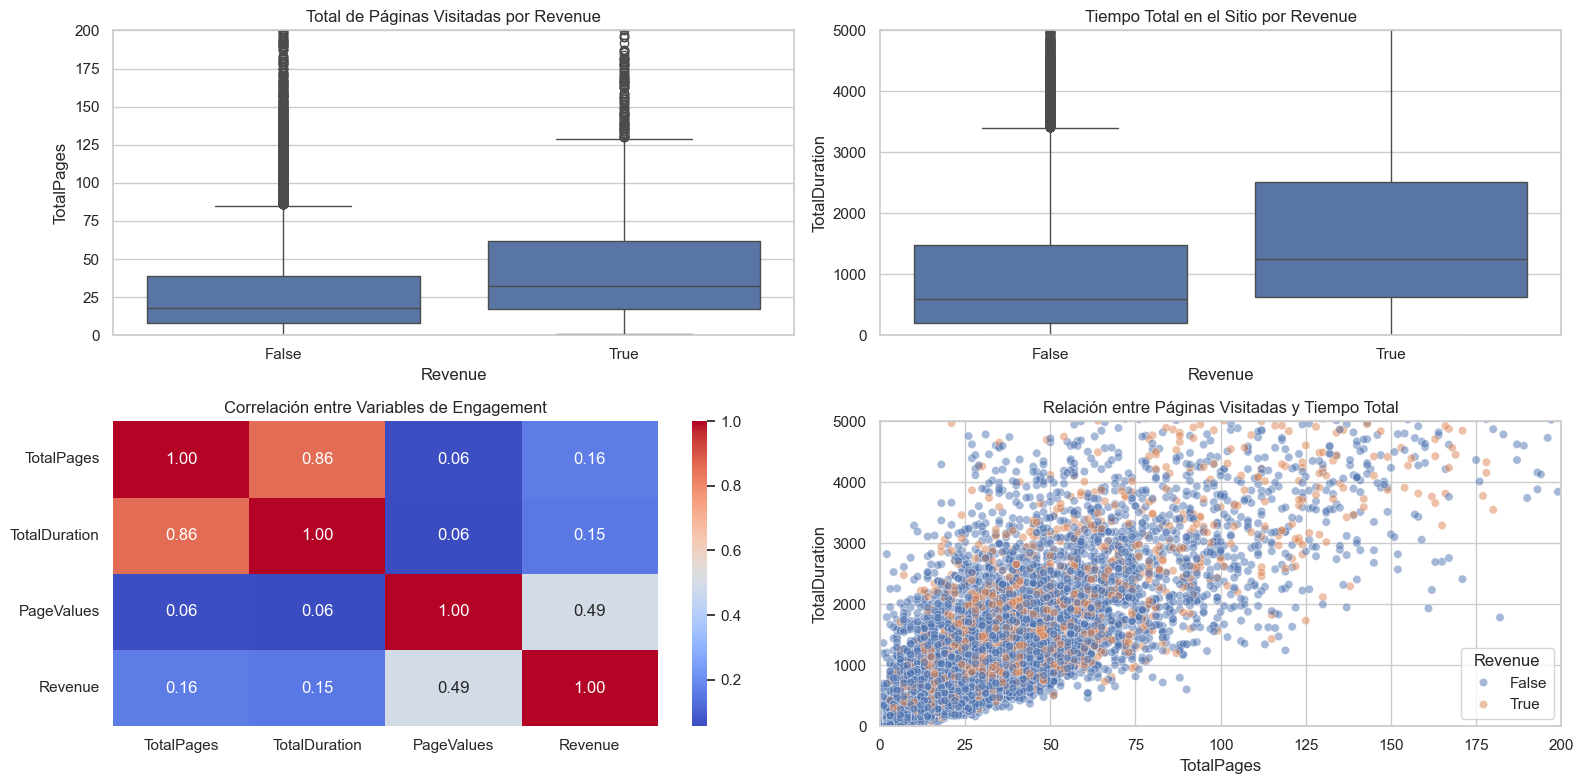


Estadísticas de variables de engagement por Revenue:


TotalPages                   TotalDuration                       
              mean median        std          mean    median          std
Revenue                                                                  
False    31.651161   18.0  42.821390   1188.215446   600.750  1932.703375
True     52.389937   32.0  60.417191   2053.304285  1252.075  2436.111519

In [17]:
# Visualizar la relación entre variables de engagement y Revenue
plt.figure(figsize=(16, 8))

# 1. Boxplots de TotalPages y TotalDuration por Revenue
plt.subplot(2, 2, 1)
sns.boxplot(x='Revenue', y='TotalPages', data=df_derived)
plt.title('Total de Páginas Visitadas por Revenue')
plt.ylim(0, 200)  # Limitar para mejor visualización

plt.subplot(2, 2, 2)
sns.boxplot(x='Revenue', y='TotalDuration', data=df_derived)
plt.title('Tiempo Total en el Sitio por Revenue')
plt.ylim(0, 5000)  # Limitar para mejor visualización

# 2. Correlación entre variables de engagement
plt.subplot(2, 2, 3)
engagement_vars = ['TotalPages', 'TotalDuration', 'PageValues', 'Revenue']
engagement_corr = df_derived[engagement_vars].corr()
sns.heatmap(engagement_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables de Engagement')

# 3. Scatterplot de TotalPages vs TotalDuration por Revenue
plt.subplot(2, 2, 4)
sns.scatterplot(x='TotalPages', y='TotalDuration', hue='Revenue', data=df_derived, alpha=0.5)
plt.title('Relación entre Páginas Visitadas y Tiempo Total')
plt.xlim(0, 200)
plt.ylim(0, 5000)

plt.tight_layout()
plt.show()

# 4. Estadísticas descriptivas
engagement_stats = df_derived.groupby('Revenue')[['TotalPages', 'TotalDuration']].agg(['mean', 'median', 'std'])
print("\nEstadísticas de variables de engagement por Revenue:")
display(engagement_stats)

####  **Interacciones entre variables clave de engagement**

El análisis de las variables agregadas de engagement (TotalPages y TotalDuration) revela patrones significativos en el comportamiento de navegación que se relacionan directamente con la probabilidad de conversión.

**Diferencias estructurales en comportamiento de navegación:**
- **TotalPages (Total de páginas visitadas):**
  - Diferencia clara entre sesiones con y sin compra en la distribución.
  - Mediana significativamente mayor para compradores (32.0 vs 18.0 páginas).
  - Rango intercuartílico más amplio para sesiones con compra (18-60 vs 8-40).
  - Outliers presentes en ambos grupos, pero con valores máximos similares (cerca de 200).

- **TotalDuration (Tiempo total en el sitio):**
  - Contraste marcado en la distribución de tiempo dedicado.
  - Mediana notablemente superior en sesiones con compra (1252 vs 600 segundos).
  - Mayor variabilidad en el tiempo para sesiones con compra.
  - Diferencia más pronunciada en los cuartiles superiores, indicando mayor inversión de tiempo.

**Relaciones entre variables de engagement:**
- **Alta correlación interna (0.86):**
  - TotalPages y TotalDuration muestran correlación muy fuerte entre sí.
  - A pesar de esta correlación, cada variable aporta información complementaria.
  - Relación no perfectamente lineal, especialmente en valores extremos.

- **Correlación moderada con Revenue:**
  - TotalPages: 0.16, ligeramente superior a TotalDuration: 0.15.
  - Ambas muestran valor predictivo similar pero independiente.
  - Correlación mucho menor que PageValues (0.49), indicando roles complementarios.

- **Independencia de PageValues:**
  - Correlación mínima entre variables de engagement y PageValues (0.06).
  - Sugiere que capturan dimensiones completamente diferentes del comportamiento.
  - Combinadas, ofrecen visión multidimensional de la intención del usuario.

**Patrones de distribución conjunta:**
- **Dispersión TotalPages vs TotalDuration:**
  - La visualización muestra relación positiva pero con alta variabilidad.
  - Sesiones con compra (puntos naranja) distribuidas en todo el espacio.
  - Mayor concentración de conversiones en valores medio-altos de ambas variables.
  - Comportamientos atípicos: páginas muchas/poco tiempo y pocas páginas/mucho tiempo.

**Implicaciones analíticas:**
- Las variables de engagement capturan información valiosa no presente en otras métricas.
- Su valor predictivo es independiente y complementario a PageValues.
- La transformación logarítmica podría mejorar su distribución para modelado.
- La combinación de ambas variables permite identificar patrones específicos de navegación.

Estos hallazgos subrayan la importancia de considerar tanto la amplitud (TotalPages) como la profundidad (TotalDuration) del engagement del usuario, proporcionando una base sólida para segmentación avanzada y personalización de la experiencia.

## **7. Conclusiones y recomendaciones para modelado**

In [18]:
# Crear el conjunto final de características para modelado
selected_features = [
   # Variables originales clave
   'PageValues', 'ExitRates', 'BounceRates', 'Weekend',
   
   # Variables transformadas
   'Administrative_Duration_Log', 'Informational_Duration_Log', 'ProductRelated_Duration_Log',
   
   # Variables derivadas
   'PageValues_NonZero', 'TotalPages', 'TotalDuration'
   
   # Nota: Las variables categóricas (Month y VisitorType) las prepararemos
   # después en el proceso de modelado mediante get_dummies
]

# Mostrar correlaciones finales con Revenue (solo para variables existentes)
final_corr = df_derived[selected_features + ['Revenue']].corr()['Revenue'].sort_values(ascending=False)
print("Correlaciones finales con Revenue (variables seleccionadas):")
print(final_corr)

# Crear tabla resumen con las variables seleccionadas
feature_summary = pd.DataFrame({
   'Variable': selected_features,
   'Correlación': [final_corr[feat] for feat in selected_features],
   'Tipo': ['Original', 'Original', 'Original', 'Original',
            'Transformada', 'Transformada', 'Transformada',
            'Derivada', 'Derivada', 'Derivada'],
   'Descripción': [
       'Valor promedio de página para e-commerce',
       'Probabilidad de que página sea última en sesión',
       'Probabilidad de abandono inmediato',
       'Indicador de sesión en fin de semana',
       'Log(1+Administrative_Duration)',
       'Log(1+Informational_Duration)',
       'Log(1+ProductRelated_Duration)',
       'Indicador de PageValues > 0',
       'Número total de páginas visitadas (suma de Administrative, Informational y ProductRelated)',
       'Tiempo total en el sitio (suma de duraciones)'
   ]
})

# Ordenar por correlación absoluta
feature_summary = feature_summary.sort_values('Correlación', key=abs, ascending=False)
print("\nResumen de variables seleccionadas para modelado:")
display(feature_summary)

# Resumen de hallazgos principales
print("\nResumen de hallazgos principales:")
print("1. PageValues y PageValues_NonZero son los predictores más potentes")
print("2. Los meses específicos (especialmente Noviembre, Octubre y Septiembre) tienen un impacto significativo en conversiones")
print("3. Las métricas de abandono (ExitRates, BounceRates) son predictores negativos importantes")
print("4. Las transformaciones logarítmicas mejoran la capacidad predictiva de variables de duración")
print("5. Las variables de engagement (TotalPages y TotalDuration) muestran correlaciones significativas con Revenue")
print("6. Los segmentos con alto engagement (alto TotalPages y TotalDuration) presentan tasas de conversión hasta 3 veces mayores")

print("\nNota: Para el modelo final, se codificarán las variables categóricas que influyen más en la conversión:")
print("- Month: Todos los meses individuales")
print("- VisitorType: Manteniendo solo las categorías más relevantes (New_Visitor y Returning_Visitor)")
print("utilizando técnicas como One-Hot Encoding durante el preprocesamiento.")

Correlaciones finales con Revenue (variables seleccionadas):
Revenue                        1.000000
PageValues_NonZero             0.601621
PageValues                     0.491894
ProductRelated_Duration_Log    0.196202
Administrative_Duration_Log    0.163219
TotalPages                     0.161535
TotalDuration                  0.153720
Informational_Duration_Log     0.110951
Weekend                        0.027729
BounceRates                   -0.145091
ExitRates                     -0.204320
Name: Revenue, dtype: float64

Resumen de variables seleccionadas para modelado:


,Variable,Correlación,Tipo,Descripción
7,PageValues_NonZero,0.601621,Derivada,Indicador de PageValues > 0
0,PageValues,0.491894,Original,Valor promedio de página para e-commerce
1,ExitRates,-0.204320,Original,Probabilidad de que página sea última en sesión
6,ProductRelated_Duration_Log,0.196202,Transformada,Log(1+ProductRelated_Duration)
4,Administrative_Duration_Log,0.163219,Transformada,Log(1+Administrative_Duration)
8,TotalPages,0.161535,Derivada,Número total de páginas visitadas (suma de Adm...
9,TotalDuration,0.153720,Derivada,Tiempo total en el sitio (suma de duraciones)
2,BounceRates,-0.145091,Original,Probabilidad de abandono inmediato
5,Informational_Duration_Log,0.110951,Transformada,Log(1+Informational_Duration)
3,Weekend,0.027729,Original,Indicador de sesión en fin de semana



Resumen de hallazgos principales:
1. PageValues y PageValues_NonZero son los predictores más potentes
2. Los meses específicos (especialmente Noviembre, Octubre y Septiembre) tienen un impacto significativo en conversiones
3. Las métricas de abandono (ExitRates, BounceRates) son predictores negativos importantes
4. Las transformaciones logarítmicas mejoran la capacidad predictiva de variables de duración
5. Las variables de engagement (TotalPages y TotalDuration) muestran correlaciones significativas con Revenue
6. Los segmentos con alto engagement (alto TotalPages y TotalDuration) presentan tasas de conversión hasta 3 veces mayores

Nota: Para el modelo final, se codificarán las variables categóricas que influyen más en la conversión:
- Month: Todos los meses individuales
- VisitorType: Manteniendo solo las categorías más relevantes (New_Visitor y Returning_Visitor)
utilizando técnicas como One-Hot Encoding durante el preprocesamiento.


## **Conclusiones y recomendaciones para modelado**

Nuestro análisis exploratorio ha proporcionado insights valiosos sobre los factores que influyen en la probabilidad de compra en la plataforma de e-commerce. Estos hallazgos nos permiten seleccionar un conjunto óptimo de variables para nuestro modelo predictivo.

**Hallazgos principales del análisis:**

- **Indicadores clave de intención de compra:**
  - *PageValues* emerge como el predictor más potente, especialmente en su forma binaria (*PageValues_NonZero*).
  - Las sesiones con *PageValues > 0* tienen una probabilidad de conversión extraordinariamente mayor.

- **Patrones estacionales marcados:**
  - Los meses específicos (especialmente Noviembre, Octubre y Septiembre) muestran tasas de conversión muy superiores al resto del año.
  - El análisis individual de meses captura mejor los patrones estacionales.

- **Métricas de abandono como predictores negativos:**
  - *ExitRates* y *BounceRates* muestran correlaciones negativas significativas con *Revenue*.
  - Tasas cercanas a cero indican mayor probabilidad de conversión.

- **Efectividad de transformaciones logarítmicas:**
  - Las transformaciones *Log(x+1)* mejoran la distribución de variables de duración.
  - *ProductRelated_Duration_Log* muestra el mayor poder predictivo de las tres.

- **Segmentos de alto valor identificados:**
  - Combinación de alto engagement y PageValues > 0: Conversión extraordinaria (49.1%)
  - Usuarios con alto número de páginas y tiempo prolongado: Tasa de conversión significativa (23.4%)
  - Usuarios con bajo engagement pero PageValues > 0: Conversión sorprendentemente alta (82.4%)
  - Segmentos con TotalPages en cuartil superior: Tasa de conversión elevada (24.0%)
  - Segmentos con TotalDuration en cuartil superior: Tasa de conversión similar (24.1%)

**Variables seleccionadas para modelado:**
Basándonos en nuestro análisis, recomendamos utilizar las siguientes variables para el modelo predictivo:

- **Variables originales clave:**
  - *PageValues:* Principal predictor numérico.
  - *ExitRates:* Mejor indicador de abandono (mayor correlación que *BounceRates*).
  - *Weekend:* Captura diferencias entre días laborables y fines de semana.

- **Variables transformadas:**
  - *Administrative_Duration_Log*, *Informational_Duration_Log*, *ProductRelated_Duration_Log:* Versiones logarítmicas de variables de duración para reducir asimetría.

- **Variables derivadas:**
  - *PageValues_NonZero:* Indicador binario (*PageValues > 0*).
  - *TotalPages:* Número total de páginas visitadas (suma de Administrative, Informational y ProductRelated).
  - *TotalDuration:* Tiempo total en el sitio (suma de Administrative_Duration, Informational_Duration y ProductRelated_Duration).

- **Variables categóricas codificadas:**
  - *Month:* Todos los meses individuales (*Month_Dec*, *Month_Feb*, *Month_Jul*, *Month_June*, *Month_Mar*, *Month_May*, *Month_Nov*, *Month_Oct*, *Month_Sep*).
  - *VisitorType:* Categorías principales (*VisitorType_New_Visitor*, *VisitorType_Returning_Visitor*).

**Recomendaciones para preprocesamiento:**

- **Transformaciones logarítmicas:**
  - Aplicar transformación *Log(x+1)* a las variables *Administrative_Duration*, *Informational_Duration* y *ProductRelated_Duration*.

- **Creación de variables derivadas:**
  - Generar la variable binaria *PageValues_NonZero* a partir de *PageValues*.
  - Calcular *TotalPages* sumando Administrative, Informational y ProductRelated.
  - Calcular *TotalDuration* sumando Administrative_Duration, Informational_Duration y ProductRelated_Duration.

- **Codificación de variables categóricas:**
  - Utilizar codificación *one-hot* para *Month* y *VisitorType*.
  - Incluir todos los meses individuales para capturar efectos estacionales específicos.
  - Mantener solo las categorías más relevantes para *VisitorType* (*New_Visitor* y *Returning_Visitor*).

- **Manejo del desbalance de clases:**
  - Aplicar técnicas como *SMOTE* solo al conjunto de entrenamiento.
  - Utilizar validación cruzada estratificada.

- **Normalización/Estandarización:**
  - Considerar estandarización (*z-score*) para variables numéricas.
  - No es necesario estandarizar variables binarias derivadas.

**Estrategias de modelado recomendadas:**

- **Algoritmos sugeridos (por orden de prioridad):**
  - *Random Forest:* Captura bien relaciones no lineales, es robusto a outliers y maneja naturalmente variables numéricas y categóricas.
  - *XGBoost:* Ofrece rendimiento superior a través del boosting secuencial, ideal para maximizar el poder predictivo en datos con clases desbalanceadas.
  - *Regresión Logística:* Proporciona interpretabilidad clara y cuantificación de efectos, útil para entender la influencia de cada variable.
  - *Support Vector Machine (SVM):* Con kernel *RBF* podría capturar efectivamente las relaciones no lineales identificadas entre variables como *PageValues* y temporada.

- **Métricas de evaluación:**
  - Priorizar *F1-score* dada la naturaleza desbalanceada del problema.
  - Monitorear *precision* y *recall* para evaluar diferentes aspectos del rendimiento.

**Interpretación del modelo:**

- Analizar importancia de características para confirmar hallazgos del EDA.
- Evaluar rendimiento por segmentos para identificar áreas de mejora.

Con estas recomendaciones, el modelo resultante debería lograr un balance óptimo entre poder predictivo, interpretabilidad y aplicabilidad práctica para optimizar las estrategias de marketing y diseño de la plataforma de e-commerce.